In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_2836\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Time/sec     1048571 non-null  object 
 1   Potential/V  1048571 non-null  float64
 2   Current/A    1048571 non-null  float64
 3   Charge/C     1048571 non-null  float64
dtypes: float64(3), object(1)
memory usage: 32.0+ MB


In [6]:
df.shape

(1048571, 4)

In [7]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [8]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [9]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [10]:
# df.drop(['Time'], axis=1,inplace=True)  # deleting the Time column

In [11]:
# df['Time'].iloc[994881]

In [12]:
df.shape

(994879, 4)

In [13]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [14]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

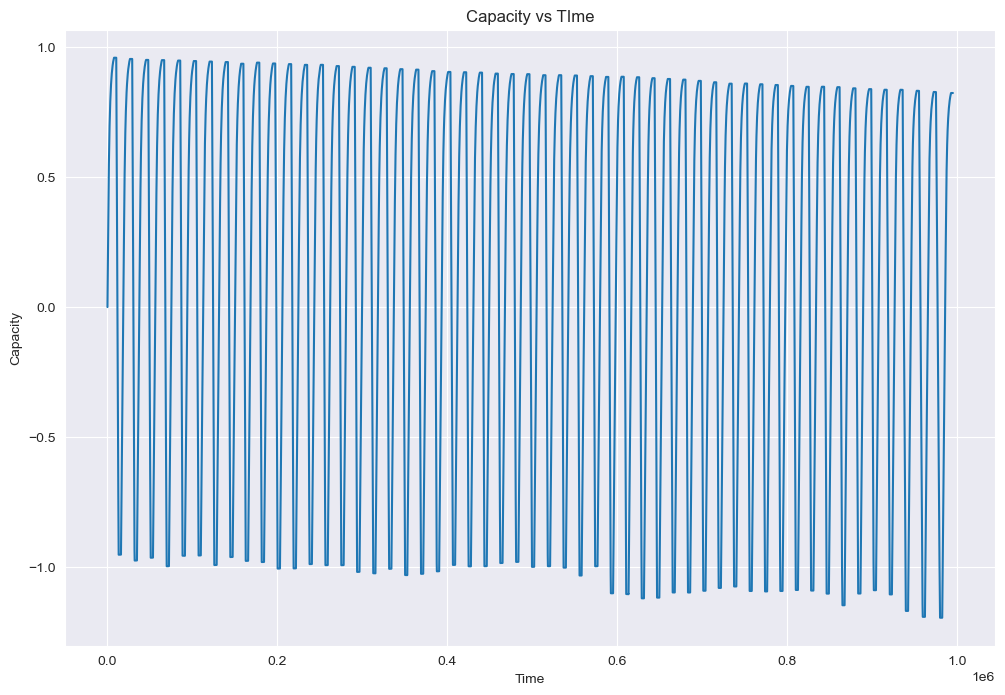

In [16]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Data Cleaning

In [17]:
# df.fillna(value=0, inplace=True)

In [18]:
# df.isnull().sum()

In [19]:
# df.info()

# Local Maxima and Minima

In [20]:
# %%time
# from scipy.signal import argrelextrema
# import numpy as np

# ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
# ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

# df.Capacity.plot(figsize=(20,12), alpha=.3)
# # filter prices that are peaks and plot them differently to be visable on the plot
# df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
# df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
# plt.ylabel("Capacity")
# plt.xlabel("Time")
# plt.title('Local Maxima and Local Minima')

In [21]:
# maximum_point = df['Capacity'][ilocs_max].unique()
# minimum_point = df['Capacity'][ilocs_min].unique()

In [22]:
# print(maximum_point)
# print(maximum_point.max())
# print(minimum_point)

In [23]:
# df.insert(loc = 4,column ='Energy',value=df['Capacity']*df["Potential"]) # do add if needed 

In [24]:
# df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [25]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [26]:
charge = df.pop('Charge')

In [27]:
df.head(20)

,Time,Potential,Current,Capacity,SOC
0,0.5,3.94214,1.24797,0.000000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237
2,2.0,3.94806,1.24790,0.000601,0.000626
3,3.0,3.95068,1.24790,0.000927,0.000966
4,4.0,3.95281,1.24790,0.001298,0.001352
5,5.0,3.95467,1.24789,0.001624,0.001692
6,6.0,3.95637,1.24791,0.001995,0.002078
7,7.0,3.95793,1.24789,0.002321,0.002417
8,8.0,3.95938,1.24790,0.002692,0.002804
9,9.0,3.96077,1.24789,0.003017,0.003143


In [28]:
# # Capacity Vs Time
# sns.set_style("darkgrid")
# plt.figure(figsize=(12, 8))
# plt.plot(df['Charge'])
# plt.ylabel('Charge')
# adf = plt.gca().get_xaxis().get_major_formatter()
# plt.xlabel('Time')
# plt.title('Capacity vs TIme')

# Integral current

In [29]:
# from scipy.integrate import cumulative_trapezoid

# p = df["Time"][:df.shape[0]]
# q = df["Current"][:df.shape[0]]

# integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

# df.loc[:, "Integral_current"] = integral

In [30]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
# plt.plot(df['Integral_current'],color='green')
# plt.ylabel('Integral_Current')
# plt.xlabel('Time')
# plt.legend(["Soc", "Integral current"], loc ="upper left")
# plt.title('Dataset')

In [31]:
df.isnull().sum()

Time         0
Potential    0
Current      0
Capacity     0
SOC          0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   SOC        994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


In [33]:
df.describe()

,Time,Potential,Current,Capacity,SOC
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622
std,288767.217690,0.382038,1.142440,0.752569,0.783926
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745
50%,501905.600000,4.147310,0.072232,0.455186,0.474152
75%,751231.300000,4.199370,0.795196,0.839904,0.874900
max,999999.600000,4.199950,1.364510,0.959319,0.999291


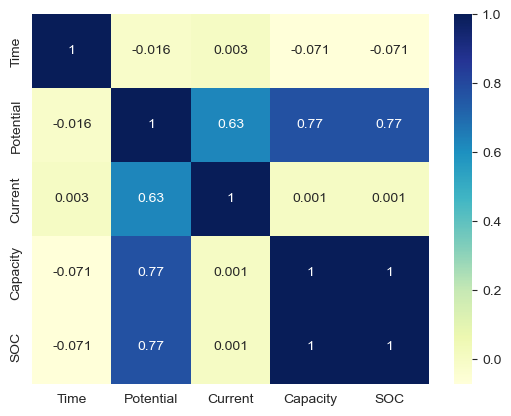

<Figure size 1400x1000 with 0 Axes>

In [34]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [35]:
# time = df.pop('Time')

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Capacity'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [37]:
df.head()

,Time,Potential,Current,Capacity,SOC
0,0.000000e+00,0.822158,0.969868,0.554717,0.000000
1,5.000005e-07,0.824159,0.969847,0.554823,0.000237
2,1.500001e-06,0.826242,0.969850,0.554996,0.000626
3,2.500002e-06,0.828049,0.969850,0.555148,0.000966
4,3.500003e-06,0.829519,0.969850,0.555320,0.001352


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   SOC        994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


In [39]:
capacity = df.pop('Capacity')
Y = df.pop('SOC')
X = df

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [41]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 3), (198976, 3), (795903,), (198976,))

In [42]:
X_train.head()

,Time,Potential,Current
751576,0.756649,0.987638,0.647200
639883,0.644934,0.999634,0.669452
936257,0.941368,0.603259,0.049733
767284,0.772360,0.999607,0.664661
298682,0.301410,0.822034,0.969767


In [43]:
Y_train.head()

751576    0.895825
639883    0.893137
936257    0.524572
767284    0.880041
298682   -0.299933
Name: SOC, dtype: float64

In [44]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [45]:
# # https://stackoverflow.com/questions/44475682/cross-validation-in-deep-neural-networks

# from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# kf =KFold(n_splits=5, shuffle=True, random_state=42)

# cnt = 1
# # split()  method generate indices to split data into training and test set.
# for train_index, test_index in kf.split(X, Y):
#     print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
#     cnt += 1

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [48]:
X_train.head()

,Time,Potential,Current
751576,0.756649,0.987638,0.647200
639883,0.644934,0.999634,0.669452
936257,0.941368,0.603259,0.049733
767284,0.772360,0.999607,0.664661
298682,0.301410,0.822034,0.969767


# Function for the AIC (Akaike information cirteria)

In [49]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

In [202]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(100,activation = 'tanh'),
                               tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(30),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=32,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0568 - rmse: 0.0890 - mae: 0.0568 - mse: 0.0079 - mape: 648.3156 - val_loss: 0.0487 - val_rmse: 0.0778 - val_mae: 0.0487 - val_mse: 0.0061 - val_mape: 48.6907
Epoch 2/100
24872/24872 [==============================] - 48s 2ms/step - loss: 0.0491 - rmse: 0.0779 - mae: 0.0491 - mse: 0.0061 - mape: 602.6085 - val_loss: 0.0480 - val_rmse: 0.0760 - val_mae: 0.0480 - val_mse: 0.0058 - val_mape: 43.8855
Epoch 3/100
24872/24872 [==============================] - 48s 2ms/step - loss: 0.0484 - rmse: 0.0771 - mae: 0.0484 - mse: 0.0060 - mape: 611.5020 - val_loss: 0.0476 - val_rmse: 0.0758 - val_mae: 0.0476 - val_mse: 0.0057 - val_mape: 44.0108
Epoch 4/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0481 - rmse: 0.0767 - mae: 0.0481 - mse: 0.0059 - mape: 630.1376 - val_loss: 0.0475 - val_rmse: 0.0753 - val_mae: 0.0475 - val_mse: 0.0057 - val_mape: 44.3854
Epoch 5/100
24872/24872 [===========

Epoch 35/100
24872/24872 [==============================] - 35s 1ms/step - loss: 0.0472 - rmse: 0.0750 - mae: 0.0472 - mse: 0.0056 - mape: 621.8038 - val_loss: 0.0470 - val_rmse: 0.0748 - val_mae: 0.0470 - val_mse: 0.0056 - val_mape: 45.5335
Epoch 36/100
24872/24872 [==============================] - 34s 1ms/step - loss: 0.0472 - rmse: 0.0750 - mae: 0.0472 - mse: 0.0056 - mape: 616.7661 - val_loss: 0.0471 - val_rmse: 0.0743 - val_mae: 0.0471 - val_mse: 0.0055 - val_mape: 43.7801
Epoch 37/100
24872/24872 [==============================] - 35s 1ms/step - loss: 0.0472 - rmse: 0.0750 - mae: 0.0472 - mse: 0.0056 - mape: 615.8925 - val_loss: 0.0470 - val_rmse: 0.0748 - val_mae: 0.0470 - val_mse: 0.0056 - val_mape: 45.4944
Epoch 38/100
24872/24872 [==============================] - 35s 1ms/step - loss: 0.0472 - rmse: 0.0750 - mae: 0.0472 - mse: 0.0056 - mape: 616.8545 - val_loss: 0.0471 - val_rmse: 0.0749 - val_mae: 0.0471 - val_mse: 0.0056 - val_mape: 45.8246
Epoch 39/100
24872/24872 [======

Epoch 69/100
24872/24872 [==============================] - 46s 2ms/step - loss: 0.0471 - rmse: 0.0748 - mae: 0.0471 - mse: 0.0056 - mape: 613.8577 - val_loss: 0.0470 - val_rmse: 0.0747 - val_mae: 0.0470 - val_mse: 0.0056 - val_mape: 45.5595
Epoch 70/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0471 - rmse: 0.0748 - mae: 0.0471 - mse: 0.0056 - mape: 614.4509 - val_loss: 0.0470 - val_rmse: 0.0745 - val_mae: 0.0470 - val_mse: 0.0055 - val_mape: 45.0590
Epoch 71/100
24872/24872 [==============================] - 43s 2ms/step - loss: 0.0471 - rmse: 0.0748 - mae: 0.0471 - mse: 0.0056 - mape: 616.1059 - val_loss: 0.0470 - val_rmse: 0.0744 - val_mae: 0.0470 - val_mse: 0.0055 - val_mape: 45.1964
Epoch 72/100
24872/24872 [==============================] - 35s 1ms/step - loss: 0.0471 - rmse: 0.0748 - mae: 0.0471 - mse: 0.0056 - mape: 612.6635 - val_loss: 0.0470 - val_rmse: 0.0742 - val_mae: 0.0470 - val_mse: 0.0055 - val_mape: 44.4514
Epoch 73/100
24872/24872 [======

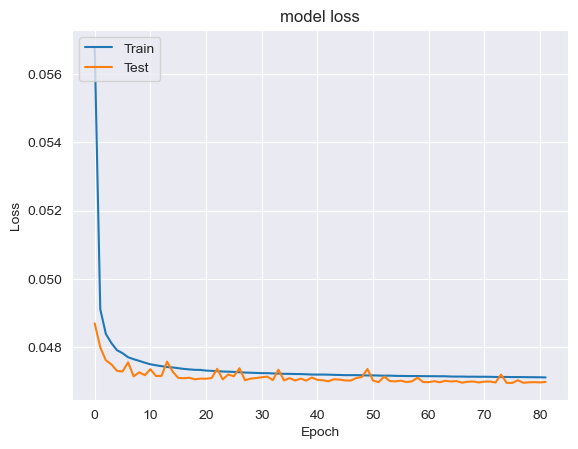

In [203]:
plot_his(history_1)

In [204]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 19s 3ms/step - loss: 0.0470 - rmse: 0.0743 - mae: 0.0470 - mse: 0.0055 - mape: 45.2581


[0.04698433727025986,
 0.07433599978685379,
 0.04698433727025986,
 0.005525840446352959,
 45.258121490478516]

In [205]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 19s 3ms/step


In [206]:
model_1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 100)               400       
                                                                 
 dense_81 (Dense)            (None, 70)                7070      
                                                                 
 dense_82 (Dense)            (None, 30)                2130      
                                                                 
 dense_83 (Dense)            (None, 10)                310       
                                                                 
 dense_84 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,921
Trainable params: 9,921
Non-trainable params: 0
_________________________________________________________________


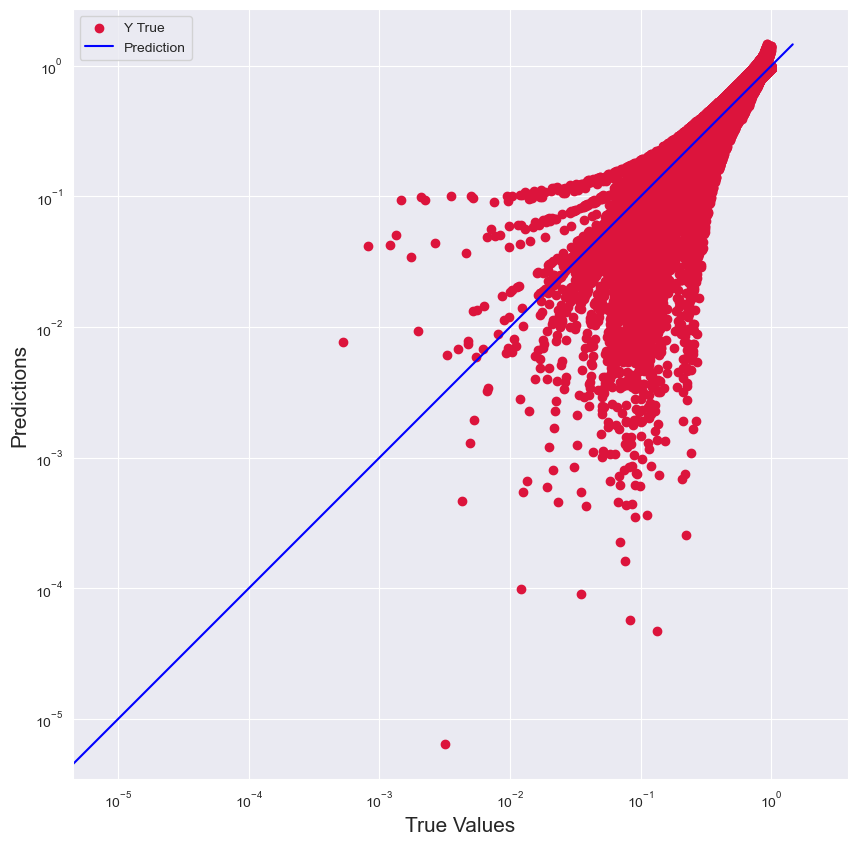

In [207]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_1), max(Y_test))
p2 = min(min(Y_pred_1), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [208]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  19841.59


In [209]:
model_1.save('Saved_models/model_1_SOCesti.h5')

In [58]:
# # AIC 1

# import tensorflow as tf
# from scipy.stats import norm

# # Train your model using TensorFlow
# model = model_1

# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
# Y_pred_1 = np.asarray(Y_pred_1).astype('float32').reshape((-1,1))


# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

# # Calculate the number of parameters in the model
# num_params = model_1.count_params()

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic.numpy())

In [59]:
# # AIC 2
# # Get the model's maximum likelihood estimate of the parameters
# params = model_1.get_weights()[0]

# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = -np.sum(Y_train * np.log(model_1.predict(X_train)) + (1 - Y_train) * np.log(1 - model_1.predict(X_train)))

# # Calculate the number of parameters in the model
# num_params = len(params)

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic)





'''
Showing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64
'''

'\nShowing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64\n'

# Function for the BIC (Baysian information criteria)

In [60]:
# # BIC
# log_likelihood = np.sum(np.log(Y_pred_1) * Y_test)

# # Calculate the BIC
# n = len(X_test)
# k = model_1.count_params()
# bic = -2 * log_likelihood + k * np.log(n)
# print(bic)

# Model 2

In [186]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'tanh'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0340 - rmse: 0.0634 - mae: 0.0340 - mse: 0.0040 - mape: 419.2740 - val_loss: 0.0289 - val_rmse: 0.0513 - val_mae: 0.0289 - val_mse: 0.0026 - val_mape: 24.5574
Epoch 2/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0274 - rmse: 0.0503 - mae: 0.0274 - mse: 0.0025 - mape: 390.3172 - val_loss: 0.0263 - val_rmse: 0.0497 - val_mae: 0.0263 - val_mse: 0.0025 - val_mape: 23.3754
Epoch 3/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0255 - rmse: 0.0489 - mae: 0.0255 - mse: 0.0024 - mape: 397.1539 - val_loss: 0.0248 - val_rmse: 0.0480 - val_mae: 0.0248 - val_mse: 0.0023 - val_mape: 22.3487
Epoch 4/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0242 - rmse: 0.0474 - mae: 0.0242 - mse: 0.0022 - mape: 369.5000 - val_loss: 0.0237 - val_rmse: 0.0467 - val_mae: 0.0237 - val_mse: 0.0022 - val_mape: 21.5532
Epoch 5/100
24872/24872 [===========

Epoch 35/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0212 - rmse: 0.0431 - mae: 0.0212 - mse: 0.0019 - mape: 326.6927 - val_loss: 0.0212 - val_rmse: 0.0431 - val_mae: 0.0212 - val_mse: 0.0019 - val_mape: 19.0382
Epoch 36/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0212 - rmse: 0.0431 - mae: 0.0212 - mse: 0.0019 - mape: 327.3282 - val_loss: 0.0212 - val_rmse: 0.0431 - val_mae: 0.0212 - val_mse: 0.0019 - val_mape: 19.0517
Epoch 37/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0211 - rmse: 0.0430 - mae: 0.0211 - mse: 0.0018 - mape: 327.9590 - val_loss: 0.0211 - val_rmse: 0.0430 - val_mae: 0.0211 - val_mse: 0.0019 - val_mape: 18.9998
Epoch 38/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0211 - rmse: 0.0430 - mae: 0.0211 - mse: 0.0018 - mape: 326.7752 - val_loss: 0.0211 - val_rmse: 0.0430 - val_mae: 0.0211 - val_mse: 0.0018 - val_mape: 19.0327
Epoch 39/100
24872/24872 [======

Epoch 69/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0205 - rmse: 0.0421 - mae: 0.0205 - mse: 0.0018 - mape: 334.6977 - val_loss: 0.0205 - val_rmse: 0.0421 - val_mae: 0.0205 - val_mse: 0.0018 - val_mape: 18.3274
Epoch 70/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0205 - rmse: 0.0420 - mae: 0.0205 - mse: 0.0018 - mape: 335.4727 - val_loss: 0.0205 - val_rmse: 0.0421 - val_mae: 0.0205 - val_mse: 0.0018 - val_mape: 18.3570
Epoch 71/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0205 - rmse: 0.0420 - mae: 0.0205 - mse: 0.0018 - mape: 335.1318 - val_loss: 0.0205 - val_rmse: 0.0420 - val_mae: 0.0205 - val_mse: 0.0018 - val_mape: 18.4538
Epoch 72/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0205 - rmse: 0.0420 - mae: 0.0205 - mse: 0.0018 - mape: 337.1221 - val_loss: 0.0205 - val_rmse: 0.0420 - val_mae: 0.0205 - val_mse: 0.0018 - val_mape: 18.4140
Epoch 73/100
24872/24872 [======

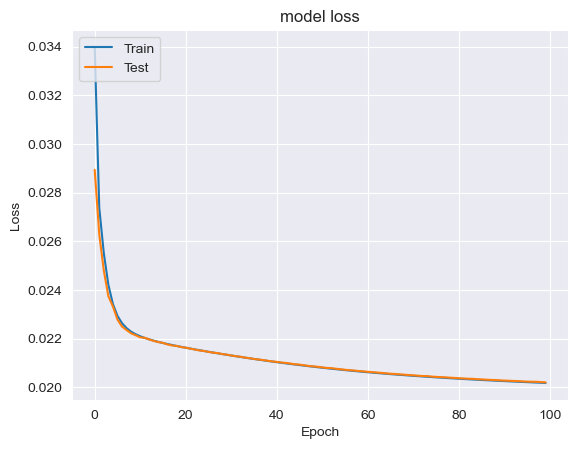

In [187]:
plot_his(history_2)

In [188]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 0.0202 - rmse: 0.0416 - mae: 0.0202 - mse: 0.0017 - mape: 18.0924


[0.0202020313590765,
 0.04155336320400238,
 0.0202020313590765,
 0.0017266820650547743,
 18.092411041259766]

In [189]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


In [190]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11941.578


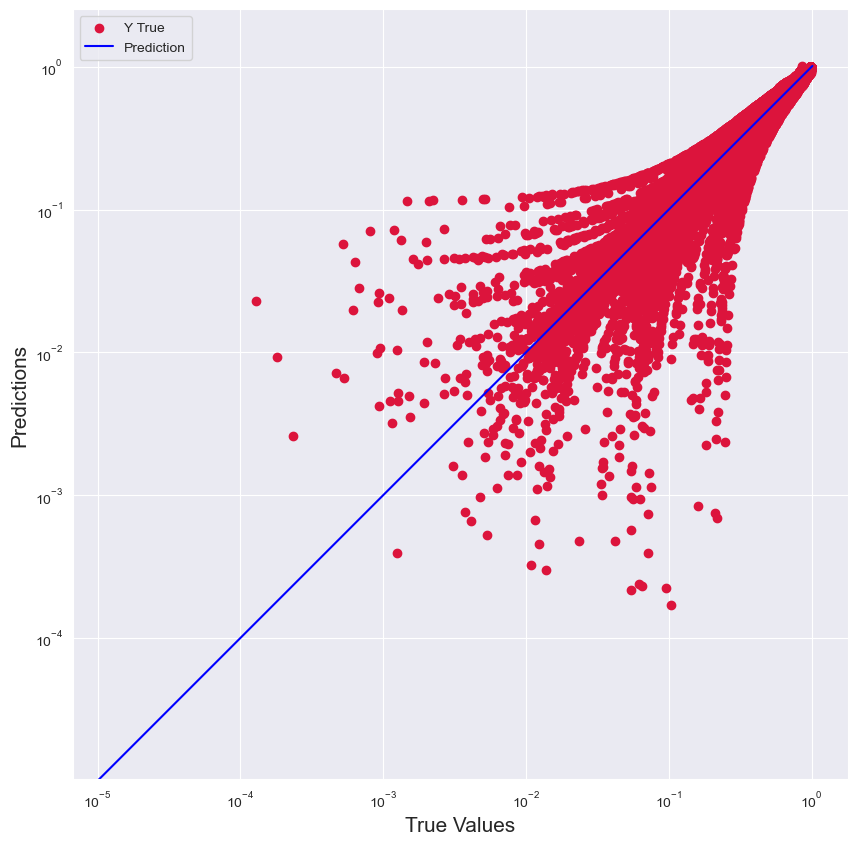

In [191]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_2), max(Y_test))
p2 = min(min(Y_pred_2), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [192]:
model_2.save('Saved_models/model_2_SOCesti.h5')

In [193]:
model_2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 100)               400       
                                                                 
 dense_72 (Dense)            (None, 50)                5050      
                                                                 
 dense_73 (Dense)            (None, 10)                510       
                                                                 
 dense_74 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,971
Trainable params: 5,971
Non-trainable params: 0
_________________________________________________________________


# Model 3

In [68]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0347 - rmse: 0.0645 - mae: 0.0347 - mse: 0.0042 - mape: 426.0717 - val_loss: 0.0299 - val_rmse: 0.0504 - val_mae: 0.0299 - val_mse: 0.0025 - val_mape: 27.4113
Epoch 2/100
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0296 - rmse: 0.0504 - mae: 0.0296 - mse: 0.0025 - mape: 454.4965 - val_loss: 0.0288 - val_rmse: 0.0501 - val_mae: 0.0288 - val_mse: 0.0025 - val_mape: 26.7512
Epoch 3/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.0290 - rmse: 0.0499 - mae: 0.0290 - mse: 0.0025 - mape: 422.8193 - val_loss: 0.0286 - val_rmse: 0.0484 - val_mae: 0.0286 - val_mse: 0.0023 - val_mape: 26.9750
Epoch 4/100
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0266 - rmse: 0.0447 - mae: 0.0266 - mse: 0.0020 - mape: 424.0171 - val_loss: 0.0264 - val_rmse: 0.0438 - val_mae: 0.0264 - val_mse: 0.0019 - val_mape: 24.7653
Epoch 5/100
24872/24872 [===========

Epoch 35/100
24872/24872 [==============================] - 44s 2ms/step - loss: 0.0248 - rmse: 0.0425 - mae: 0.0248 - mse: 0.0018 - mape: 433.9089 - val_loss: 0.0248 - val_rmse: 0.0426 - val_mae: 0.0248 - val_mse: 0.0018 - val_mape: 24.7098
Epoch 36/100
24872/24872 [==============================] - 42s 2ms/step - loss: 0.0248 - rmse: 0.0425 - mae: 0.0248 - mse: 0.0018 - mape: 438.7510 - val_loss: 0.0248 - val_rmse: 0.0425 - val_mae: 0.0248 - val_mse: 0.0018 - val_mape: 24.9015
Epoch 37/100
24872/24872 [==============================] - 44s 2ms/step - loss: 0.0248 - rmse: 0.0425 - mae: 0.0248 - mse: 0.0018 - mape: 431.7405 - val_loss: 0.0248 - val_rmse: 0.0428 - val_mae: 0.0248 - val_mse: 0.0018 - val_mape: 24.7358
Epoch 38/100
24872/24872 [==============================] - 43s 2ms/step - loss: 0.0248 - rmse: 0.0425 - mae: 0.0248 - mse: 0.0018 - mape: 430.6050 - val_loss: 0.0248 - val_rmse: 0.0426 - val_mae: 0.0248 - val_mse: 0.0018 - val_mape: 24.5780
Epoch 39/100
24872/24872 [======

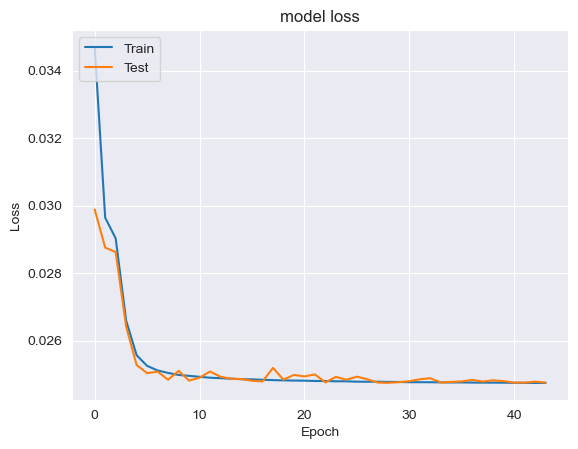

In [69]:
plot_his(history_3)

In [70]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 0.0248 - rmse: 0.0426 - mae: 0.0248 - mse: 0.0018 - mape: 24.7142


[0.024757465347647667,
 0.04261833429336548,
 0.024757465347647667,
 0.001816322561353445,
 24.714174270629883]

In [71]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 6s 961us/step


In [72]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  8701.583


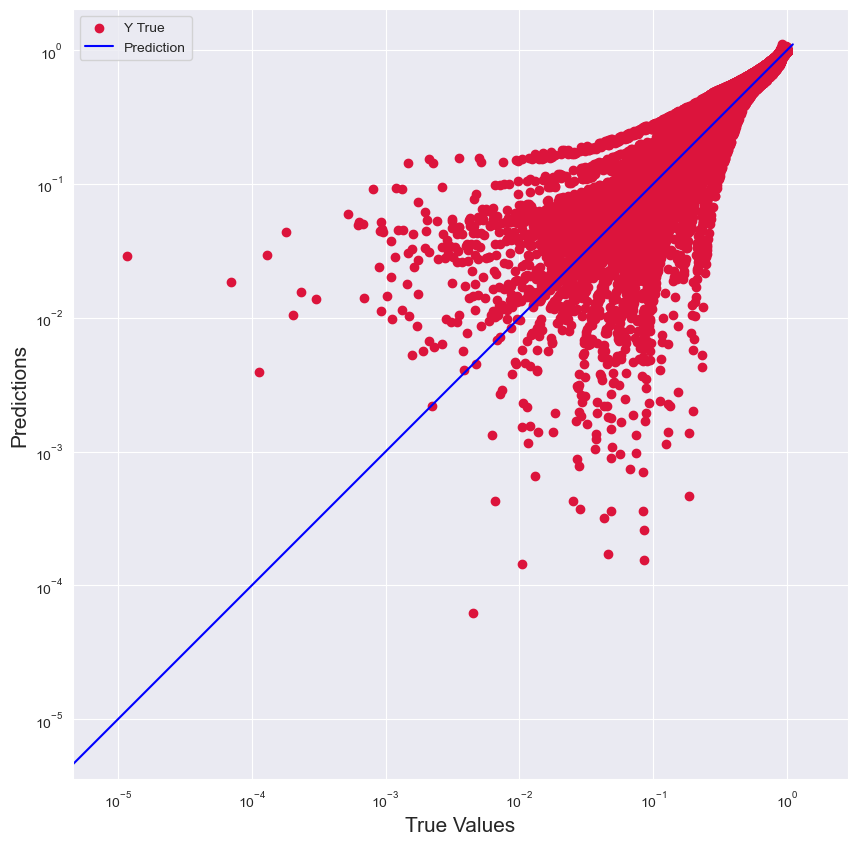

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_3, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_3), max(Y_test))
p2 = min(min(Y_pred_3), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [74]:
model_3.save('Saved_models/model_3_SOCesti.h5')

# Model 4

In [179]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(50,activation='tanh'),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100, batch_size=16,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
49744/49744 [==============================] - 198s 4ms/step - loss: 0.0312 - rmse: 0.0543 - mae: 0.0312 - mse: 0.0029 - mape: 422.4937 - val_loss: 0.0221 - val_rmse: 0.0404 - val_mae: 0.0221 - val_mse: 0.0016 - val_mape: 15.5029
Epoch 2/100
49744/49744 [==============================] - 186s 4ms/step - loss: 0.0228 - rmse: 0.0406 - mae: 0.0228 - mse: 0.0016 - mape: 417.5727 - val_loss: 0.0221 - val_rmse: 0.0405 - val_mae: 0.0221 - val_mse: 0.0016 - val_mape: 14.4923
Epoch 3/100
49744/49744 [==============================] - 183s 4ms/step - loss: 0.0219 - rmse: 0.0398 - mae: 0.0219 - mse: 0.0016 - mape: 447.6977 - val_loss: 0.0215 - val_rmse: 0.0398 - val_mae: 0.0215 - val_mse: 0.0016 - val_mape: 15.0462
Epoch 4/100
49744/49744 [==============================] - 181s 4ms/step - loss: 0.0213 - rmse: 0.0396 - mae: 0.0213 - mse: 0.0016 - mape: 455.3553 - val_loss: 0.0217 - val_rmse: 0.0397 - val_mae: 0.0217 - val_mse: 0.0016 - val_mape: 16.1317
Epoch 5/100
49744/49744 [=======

Epoch 35/100
49744/49744 [==============================] - 98s 2ms/step - loss: 0.0203 - rmse: 0.0374 - mae: 0.0203 - mse: 0.0014 - mape: 443.6027 - val_loss: 0.0203 - val_rmse: 0.0377 - val_mae: 0.0203 - val_mse: 0.0014 - val_mape: 15.7905
Epoch 36/100
49744/49744 [==============================] - 107s 2ms/step - loss: 0.0202 - rmse: 0.0374 - mae: 0.0202 - mse: 0.0014 - mape: 452.3190 - val_loss: 0.0203 - val_rmse: 0.0373 - val_mae: 0.0203 - val_mse: 0.0014 - val_mape: 15.8617
Epoch 37/100
49744/49744 [==============================] - 103s 2ms/step - loss: 0.0202 - rmse: 0.0374 - mae: 0.0202 - mse: 0.0014 - mape: 448.4870 - val_loss: 0.0202 - val_rmse: 0.0376 - val_mae: 0.0202 - val_mse: 0.0014 - val_mape: 15.5018
Epoch 38/100
49744/49744 [==============================] - 98s 2ms/step - loss: 0.0199 - rmse: 0.0372 - mae: 0.0199 - mse: 0.0014 - mape: 455.6237 - val_loss: 0.0198 - val_rmse: 0.0368 - val_mae: 0.0198 - val_mse: 0.0014 - val_mape: 15.6528
Epoch 39/100
49744/49744 [====

49744/49744 [==============================] - 95s 2ms/step - loss: 0.0131 - rmse: 0.0267 - mae: 0.0131 - mse: 7.1247e-04 - mape: 362.9664 - val_loss: 0.0129 - val_rmse: 0.0265 - val_mae: 0.0129 - val_mse: 7.0409e-04 - val_mape: 10.0487
Epoch 69/100
49744/49744 [==============================] - 110s 2ms/step - loss: 0.0128 - rmse: 0.0262 - mae: 0.0128 - mse: 6.8762e-04 - mape: 364.2533 - val_loss: 0.0127 - val_rmse: 0.0261 - val_mae: 0.0127 - val_mse: 6.8159e-04 - val_mape: 9.6232
Epoch 70/100
49744/49744 [==============================] - 105s 2ms/step - loss: 0.0126 - rmse: 0.0259 - mae: 0.0126 - mse: 6.7130e-04 - mape: 362.3362 - val_loss: 0.0125 - val_rmse: 0.0259 - val_mae: 0.0125 - val_mse: 6.6947e-04 - val_mape: 9.9544
Epoch 71/100
49744/49744 [==============================] - 100s 2ms/step - loss: 0.0124 - rmse: 0.0257 - mae: 0.0124 - mse: 6.6131e-04 - mape: 355.7895 - val_loss: 0.0125 - val_rmse: 0.0257 - val_mae: 0.0125 - val_mse: 6.5810e-04 - val_mape: 9.8472
Epoch 72/100


CPU times: total: 6h 39min 52s
Wall time: 3h 15min 15s


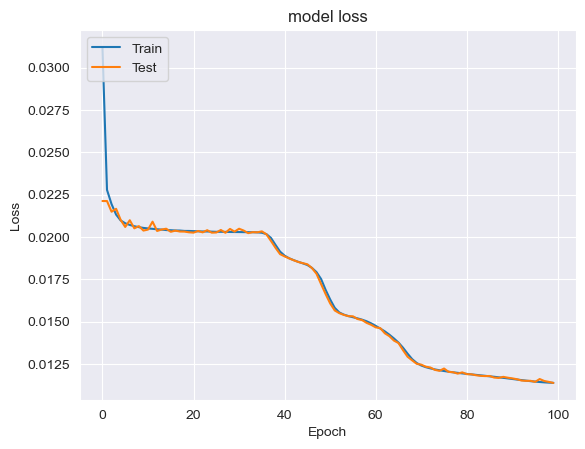

In [180]:
plot_his(history_4)

In [181]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 0.0114 - rmse: 0.0243 - mae: 0.0114 - mse: 5.9043e-04 - mape: 9.2937


[0.011374132707715034,
 0.024298785254359245,
 0.011374132707715034,
 0.0005904309800826013,
 9.293700218200684]

In [182]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [183]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  47541.582


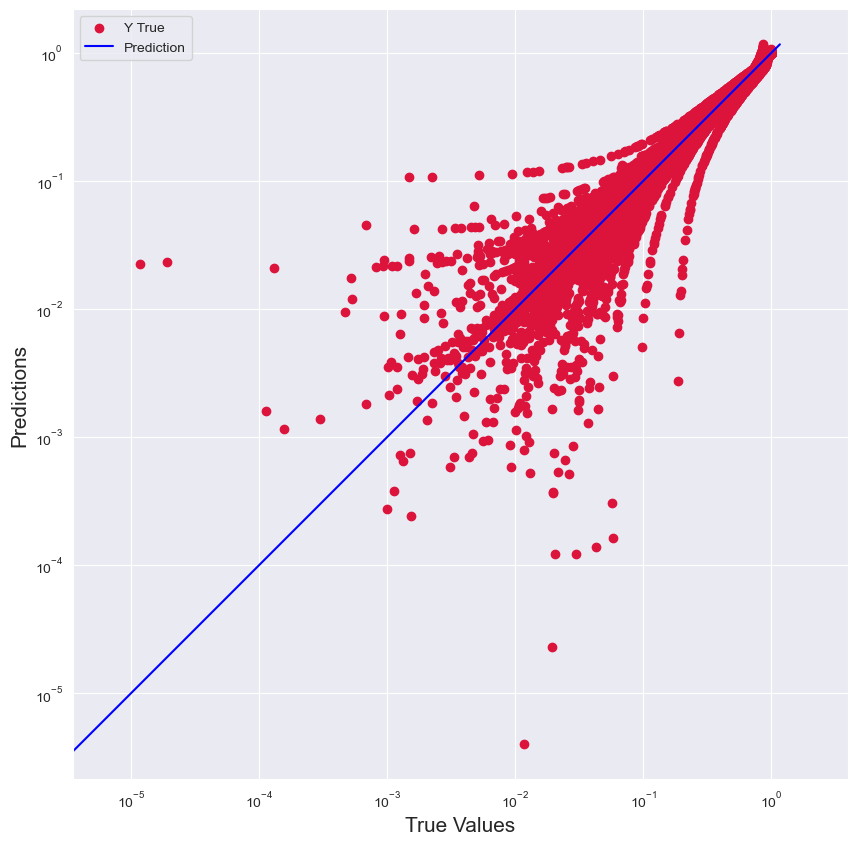

In [184]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_4, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_4), max(Y_test))
p2 = min(min(Y_pred_4), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [185]:
model_4.save('Saved_models/model_4_SOCesti.h5')

# LSTM


# Model 5

In [82]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(3,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 95s 4ms/step - loss: 0.0619 - rmse: 0.1318 - mae: 0.0619 - mse: 0.0174 - mape: 501.8426 - val_loss: 0.0396 - val_rmse: 0.0654 - val_mae: 0.0396 - val_mse: 0.0043 - val_mape: 35.3942
Epoch 2/50
24872/24872 [==============================] - 94s 4ms/step - loss: 0.0384 - rmse: 0.0633 - mae: 0.0384 - mse: 0.0040 - mape: 474.9739 - val_loss: 0.0357 - val_rmse: 0.0609 - val_mae: 0.0357 - val_mse: 0.0037 - val_mape: 29.9826
Epoch 3/50
24872/24872 [==============================] - 93s 4ms/step - loss: 0.0352 - rmse: 0.0597 - mae: 0.0352 - mse: 0.0036 - mape: 467.9539 - val_loss: 0.0344 - val_rmse: 0.0597 - val_mae: 0.0344 - val_mse: 0.0036 - val_mape: 32.8708
Epoch 4/50
24872/24872 [==============================] - 93s 4ms/step - loss: 0.0329 - rmse: 0.0561 - mae: 0.0329 - mse: 0.0031 - mape: 475.9738 - val_loss: 0.0321 - val_rmse: 0.0545 - val_mae: 0.0321 - val_mse: 0.0030 - val_mape: 28.6990
Epoch 5/50
24872/24872 [================

24872/24872 [==============================] - 95s 4ms/step - loss: 0.0119 - rmse: 0.0241 - mae: 0.0119 - mse: 5.8193e-04 - mape: 395.3888 - val_loss: 0.0121 - val_rmse: 0.0243 - val_mae: 0.0121 - val_mse: 5.8999e-04 - val_mape: 9.4081
Epoch 35/50
24872/24872 [==============================] - 94s 4ms/step - loss: 0.0118 - rmse: 0.0240 - mae: 0.0118 - mse: 5.7581e-04 - mape: 402.1075 - val_loss: 0.0118 - val_rmse: 0.0241 - val_mae: 0.0118 - val_mse: 5.7992e-04 - val_mape: 9.7519
Epoch 36/50
24872/24872 [==============================] - 94s 4ms/step - loss: 0.0117 - rmse: 0.0239 - mae: 0.0117 - mse: 5.6942e-04 - mape: 396.5206 - val_loss: 0.0117 - val_rmse: 0.0238 - val_mae: 0.0117 - val_mse: 5.6792e-04 - val_mape: 9.7616
Epoch 37/50
24872/24872 [==============================] - 94s 4ms/step - loss: 0.0116 - rmse: 0.0237 - mae: 0.0116 - mse: 5.6365e-04 - mape: 394.8102 - val_loss: 0.0116 - val_rmse: 0.0239 - val_mae: 0.0116 - val_mse: 5.7236e-04 - val_mape: 9.5576
Epoch 38/50
24872/24

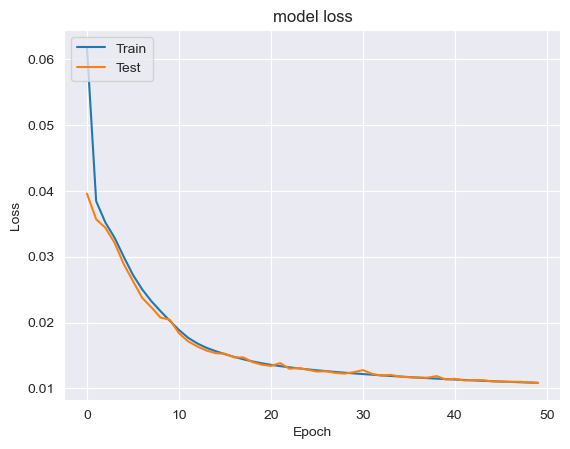

In [83]:
plot_his(history_5)

In [84]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.0108 - rmse: 0.0226 - mae: 0.0108 - mse: 5.1136e-04 - mape: 8.7664


[0.010836318135261536,
 0.022613167762756348,
 0.010836318135261536,
 0.0005113553488627076,
 8.766423225402832]

In [85]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [86]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [87]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25701.584


In [88]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


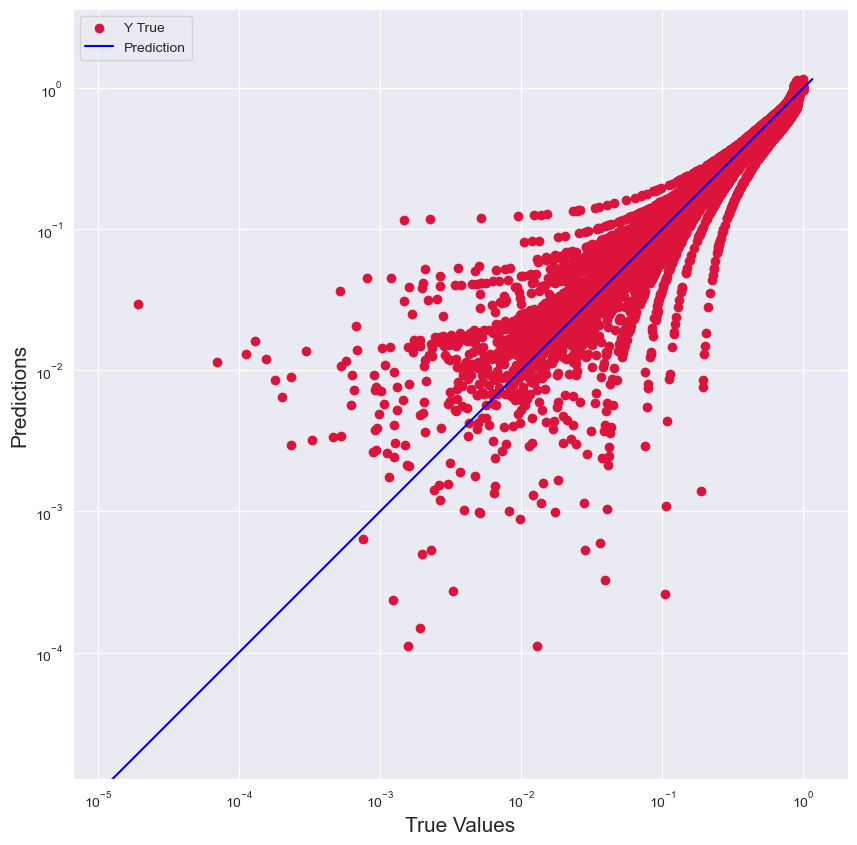

In [89]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_5, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_5), max(Y_test))
p2 = min(min(prediction_5), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [90]:
model_5.save('Saved_models/model_5_SOCesti.h5')

# Model 6

In [91]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(3,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 108s 4ms/step - loss: 0.0405 - rmse: 0.1048 - mae: 0.0405 - mse: 0.0110 - mape: 423.1299 - val_loss: 0.0179 - val_rmse: 0.0313 - val_mae: 0.0179 - val_mse: 9.7821e-04 - val_mape: 13.5703
Epoch 2/40
24872/24872 [==============================] - 103s 4ms/step - loss: 0.0157 - rmse: 0.0283 - mae: 0.0157 - mse: 8.0278e-04 - mape: 442.4349 - val_loss: 0.0127 - val_rmse: 0.0252 - val_mae: 0.0127 - val_mse: 6.3690e-04 - val_mape: 9.4779
Epoch 3/40
24872/24872 [==============================] - 103s 4ms/step - loss: 0.0129 - rmse: 0.0246 - mae: 0.0129 - mse: 6.0437e-04 - mape: 404.1747 - val_loss: 0.0118 - val_rmse: 0.0235 - val_mae: 0.0118 - val_mse: 5.5126e-04 - val_mape: 9.6301
Epoch 4/40
24872/24872 [==============================] - 103s 4ms/step - loss: 0.0116 - rmse: 0.0227 - mae: 0.0116 - mse: 5.1399e-04 - mape: 413.3387 - val_loss: 0.0115 - val_rmse: 0.0223 - val_mae: 0.0115 - val_mse: 4.9664e-04 - val_mape: 9.8148
Epoch 5/40


Epoch 34/40
24872/24872 [==============================] - 125s 5ms/step - loss: 0.0068 - rmse: 0.0145 - mae: 0.0068 - mse: 2.0883e-04 - mape: 366.6531 - val_loss: 0.0069 - val_rmse: 0.0146 - val_mae: 0.0069 - val_mse: 2.1220e-04 - val_mape: 7.2714
Epoch 35/40
24872/24872 [==============================] - 114s 5ms/step - loss: 0.0068 - rmse: 0.0144 - mae: 0.0068 - mse: 2.0753e-04 - mape: 365.3589 - val_loss: 0.0068 - val_rmse: 0.0144 - val_mae: 0.0068 - val_mse: 2.0752e-04 - val_mape: 7.1550
Epoch 36/40
24872/24872 [==============================] - 122s 5ms/step - loss: 0.0068 - rmse: 0.0143 - mae: 0.0068 - mse: 2.0574e-04 - mape: 366.9226 - val_loss: 0.0071 - val_rmse: 0.0145 - val_mae: 0.0071 - val_mse: 2.1082e-04 - val_mape: 7.2518
Epoch 37/40
24872/24872 [==============================] - 90s 4ms/step - loss: 0.0068 - rmse: 0.0143 - mae: 0.0068 - mse: 2.0443e-04 - mape: 363.1909 - val_loss: 0.0068 - val_rmse: 0.0144 - val_mae: 0.0068 - val_mse: 2.0612e-04 - val_mape: 7.0213
Epoch

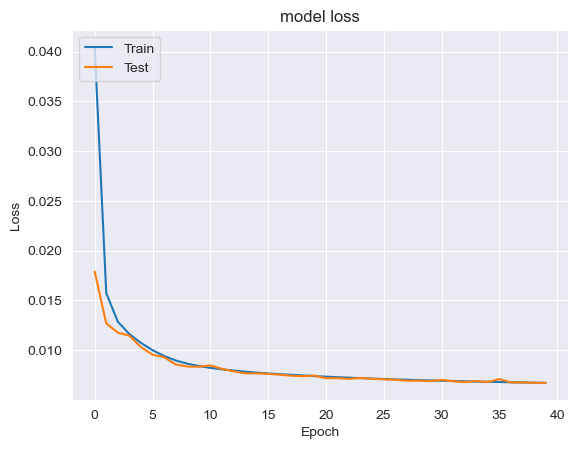

In [92]:
plot_his(history_6)

In [93]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [94]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 9s 1ms/step - loss: 0.0067 - rmse: 0.0141 - mae: 0.0067 - mse: 1.9916e-04 - mape: 6.7680


[0.00670385267585516,
 0.014112401753664017,
 0.00670385267585516,
 0.00019915988377761096,
 6.768021106719971]

In [95]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [96]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65841.58


In [97]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


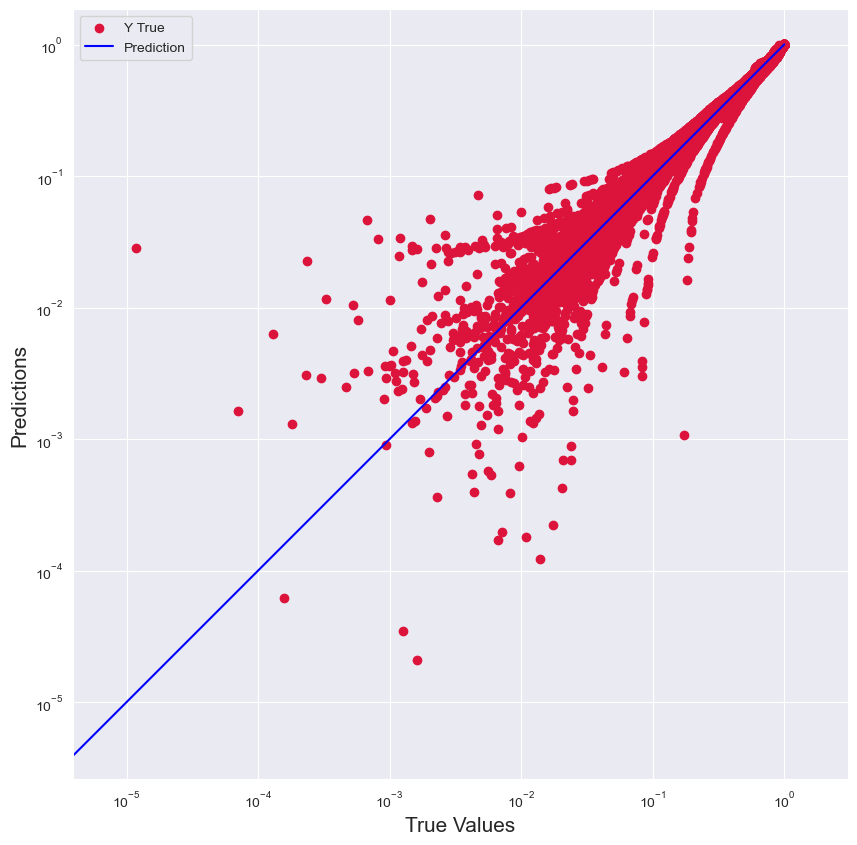

In [98]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_6, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_6), max(Y_test))
p2 = min(min(prediction_6), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [99]:
model_6.save('Saved_models/model_6_SOCesti.h5')

# Model 7

In [100]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(3,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 25s 4ms/step - loss: 0.1002 - rmse: 0.2089 - mae: 0.1002 - mse: 0.0437 - mape: 714.8801 - val_loss: 0.0473 - val_rmse: 0.0743 - val_mae: 0.0473 - val_mse: 0.0055 - val_mape: 45.6050
Epoch 2/70
6218/6218 [==============================] - 28s 5ms/step - loss: 0.0486 - rmse: 0.0767 - mae: 0.0486 - mse: 0.0059 - mape: 544.9620 - val_loss: 0.0455 - val_rmse: 0.0748 - val_mae: 0.0455 - val_mse: 0.0056 - val_mape: 42.8204
Epoch 3/70
6218/6218 [==============================] - 28s 4ms/step - loss: 0.0464 - rmse: 0.0747 - mae: 0.0464 - mse: 0.0056 - mape: 545.5942 - val_loss: 0.0444 - val_rmse: 0.0720 - val_mae: 0.0444 - val_mse: 0.0052 - val_mape: 39.5426
Epoch 4/70
6218/6218 [==============================] - 26s 4ms/step - loss: 0.0451 - rmse: 0.0732 - mae: 0.0451 - mse: 0.0054 - mape: 475.9959 - val_loss: 0.0445 - val_rmse: 0.0709 - val_mae: 0.0445 - val_mse: 0.0050 - val_mape: 35.4738
Epoch 5/70
6218/6218 [==========================

6218/6218 [==============================] - 32s 5ms/step - loss: 0.0278 - rmse: 0.0553 - mae: 0.0278 - mse: 0.0031 - mape: 451.2606 - val_loss: 0.0280 - val_rmse: 0.0558 - val_mae: 0.0280 - val_mse: 0.0031 - val_mape: 21.1626
Epoch 36/70
6218/6218 [==============================] - 27s 4ms/step - loss: 0.0276 - rmse: 0.0550 - mae: 0.0276 - mse: 0.0030 - mape: 444.2219 - val_loss: 0.0272 - val_rmse: 0.0549 - val_mae: 0.0272 - val_mse: 0.0030 - val_mape: 20.4581
Epoch 37/70
6218/6218 [==============================] - 28s 4ms/step - loss: 0.0274 - rmse: 0.0547 - mae: 0.0274 - mse: 0.0030 - mape: 439.1459 - val_loss: 0.0273 - val_rmse: 0.0548 - val_mae: 0.0273 - val_mse: 0.0030 - val_mape: 20.0899
Epoch 38/70
6218/6218 [==============================] - 34s 6ms/step - loss: 0.0272 - rmse: 0.0544 - mae: 0.0272 - mse: 0.0030 - mape: 436.6584 - val_loss: 0.0279 - val_rmse: 0.0545 - val_mae: 0.0279 - val_mse: 0.0030 - val_mape: 20.1944
Epoch 39/70
6218/6218 [==============================] -

6218/6218 [==============================] - 22s 4ms/step - loss: 0.0210 - rmse: 0.0429 - mae: 0.0210 - mse: 0.0018 - mape: 419.7196 - val_loss: 0.0209 - val_rmse: 0.0425 - val_mae: 0.0209 - val_mse: 0.0018 - val_mape: 14.8920
Epoch 70/70
6218/6218 [==============================] - 21s 3ms/step - loss: 0.0209 - rmse: 0.0424 - mae: 0.0209 - mse: 0.0018 - mape: 423.3936 - val_loss: 0.0208 - val_rmse: 0.0420 - val_mae: 0.0208 - val_mse: 0.0018 - val_mape: 15.9103


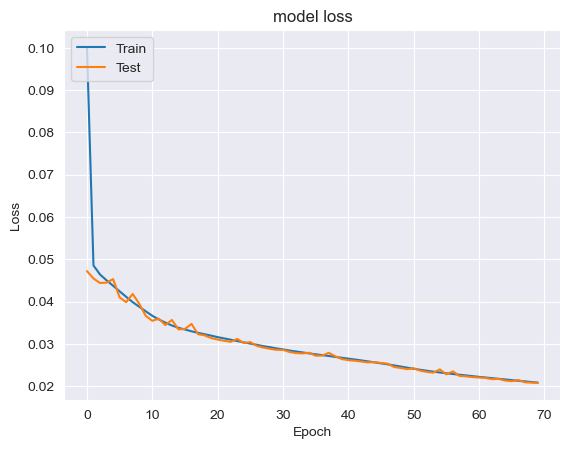

In [101]:
plot_his(history_7)

In [102]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


In [103]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 9s 1ms/step - loss: 0.0208 - rmse: 0.0420 - mae: 0.0208 - mse: 0.0018 - mape: 15.9103


[0.020820550620555878,
 0.041974540799856186,
 0.020820550620555878,
 0.0017618619604036212,
 15.910283088684082]

In [104]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11201.586


In [105]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


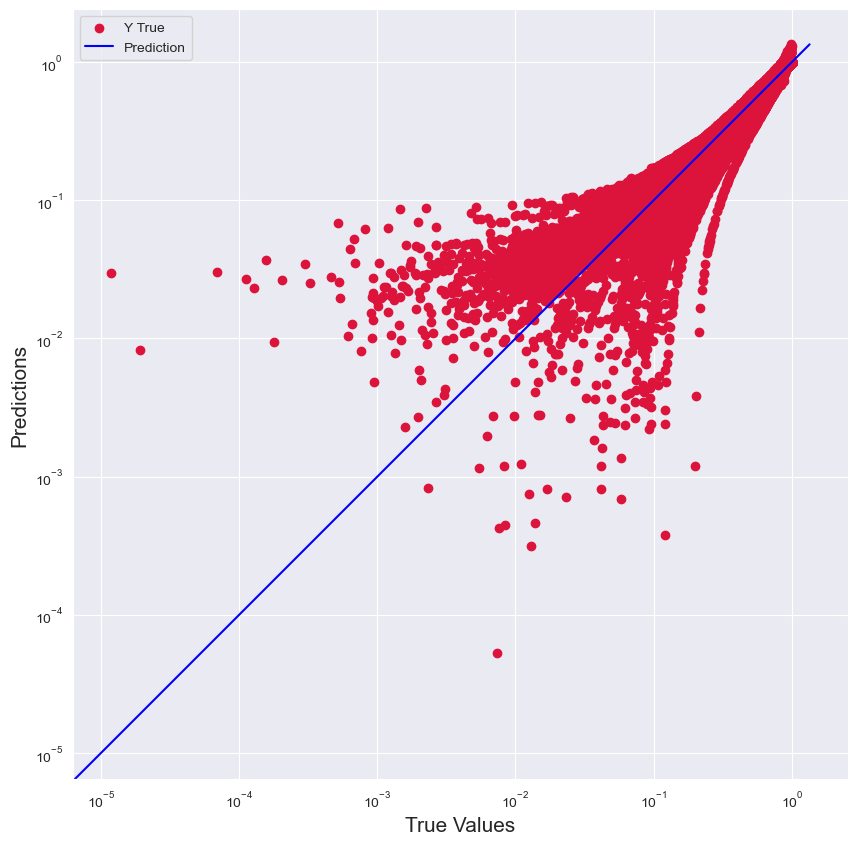

In [106]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_7, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_7), max(Y_test))
p2 = min(min(prediction_7), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [107]:
model_7.save('Saved_models/model_7_SOCesti.h5')

In [108]:
# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
# prediction_7 = np.asarray(prediction_7).astype('float32').reshape((-1,1))


# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=prediction_7[:198976]))

# # Calculate the number of parameters in the model
# num_params = model_7.count_params()

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic.numpy())

In [109]:
# AIC_value(model_7,prediction_7[:198976],Y_test)  # becaus logitis are geetting shape error

# Model 8

In [110]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(3,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 54s 4ms/step - loss: 0.0747 - rmse: 0.1523 - mae: 0.0747 - mse: 0.0232 - mape: 622.2983 - val_loss: 0.0481 - val_rmse: 0.0787 - val_mae: 0.0481 - val_mse: 0.0062 - val_mape: 47.2329
Epoch 2/40
12436/12436 [==============================] - 53s 4ms/step - loss: 0.0464 - rmse: 0.0761 - mae: 0.0464 - mse: 0.0058 - mape: 477.9442 - val_loss: 0.0478 - val_rmse: 0.0749 - val_mae: 0.0478 - val_mse: 0.0056 - val_mape: 34.6809
Epoch 3/40
12436/12436 [==============================] - 53s 4ms/step - loss: 0.0458 - rmse: 0.0752 - mae: 0.0458 - mse: 0.0057 - mape: 522.9045 - val_loss: 0.0467 - val_rmse: 0.0737 - val_mae: 0.0467 - val_mse: 0.0054 - val_mape: 35.5435
Epoch 4/40
12436/12436 [==============================] - 53s 4ms/step - loss: 0.0455 - rmse: 0.0746 - mae: 0.0455 - mse: 0.0056 - mape: 508.2439 - val_loss: 0.0450 - val_rmse: 0.0730 - val_mae: 0.0450 - val_mse: 0.0053 - val_mape: 38.1250
Epoch 5/40
12436/12436 [================

12436/12436 [==============================] - 53s 4ms/step - loss: 0.0430 - rmse: 0.0713 - mae: 0.0430 - mse: 0.0051 - mape: 486.0267 - val_loss: 0.0428 - val_rmse: 0.0708 - val_mae: 0.0428 - val_mse: 0.0050 - val_mape: 36.5782
Epoch 36/40
12436/12436 [==============================] - 53s 4ms/step - loss: 0.0430 - rmse: 0.0713 - mae: 0.0430 - mse: 0.0051 - mape: 484.5038 - val_loss: 0.0427 - val_rmse: 0.0707 - val_mae: 0.0427 - val_mse: 0.0050 - val_mape: 35.3704
Epoch 37/40
12436/12436 [==============================] - 53s 4ms/step - loss: 0.0429 - rmse: 0.0712 - mae: 0.0429 - mse: 0.0051 - mape: 478.6809 - val_loss: 0.0427 - val_rmse: 0.0708 - val_mae: 0.0427 - val_mse: 0.0050 - val_mape: 35.8919
Epoch 38/40
12436/12436 [==============================] - 53s 4ms/step - loss: 0.0429 - rmse: 0.0712 - mae: 0.0429 - mse: 0.0051 - mape: 476.4025 - val_loss: 0.0427 - val_rmse: 0.0707 - val_mae: 0.0427 - val_mse: 0.0050 - val_mape: 35.6568
Epoch 39/40
12436/12436 [=======================

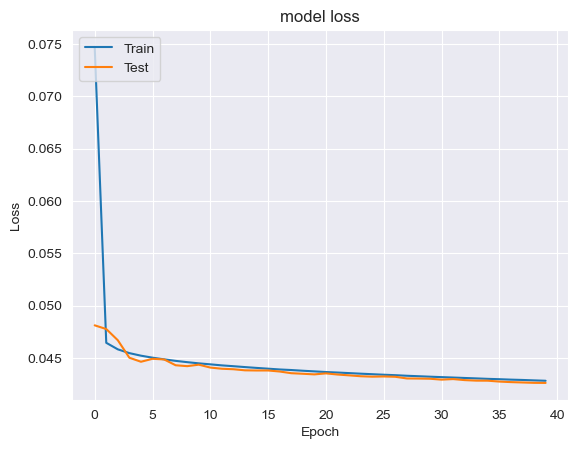

In [111]:
plot_his(history_8)

In [112]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [113]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 0.0426 - rmse: 0.0708 - mae: 0.0426 - mse: 0.0050 - mape: 36.2896


[0.04261447861790657,
 0.07081800699234009,
 0.04261447861790657,
 0.005015190225094557,
 36.28961181640625]

In [114]:
AIC_value(model_8,prediction_8, Y_test)

AIC:  65841.59


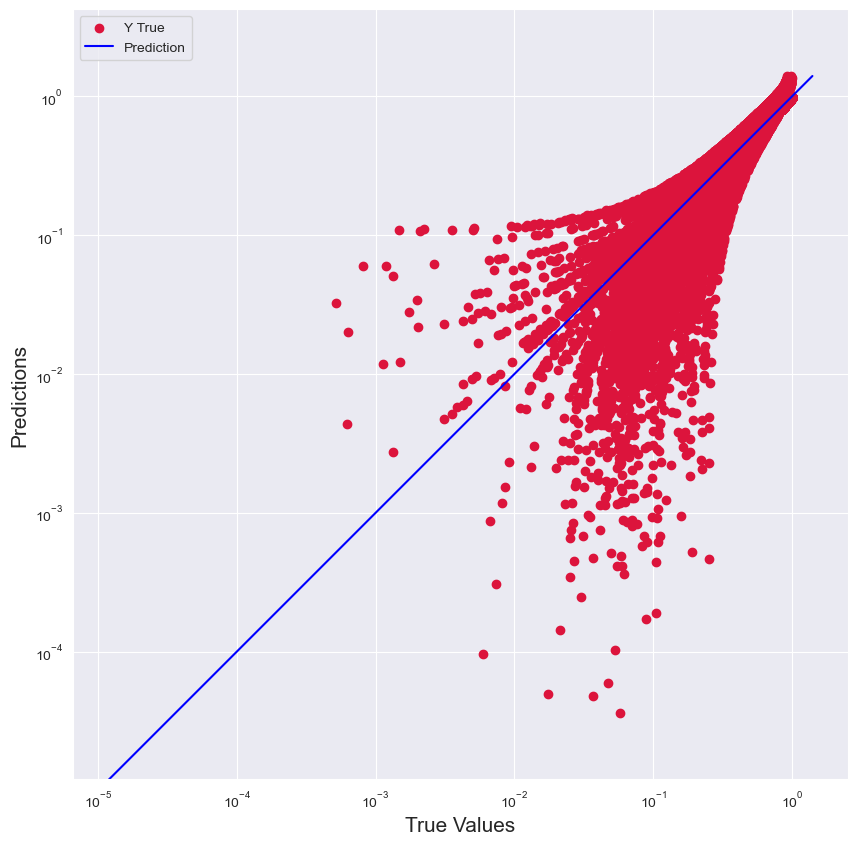

In [115]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_8, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_8), max(Y_test))
p2 = min(min(prediction_8), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [116]:
model_8.save('Saved_models/model_8_SOCesti.h5')

# CNN

# Model 9

In [117]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(3,1)),
                               tf.keras.layers.Conv1D(10,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 31s 1ms/step - loss: 0.0349 - rmse: 0.0735 - mae: 0.0349 - mse: 0.0054 - mape: 454.1803 - val_loss: 0.0284 - val_rmse: 0.0484 - val_mae: 0.0284 - val_mse: 0.0023 - val_mape: 24.2427
Epoch 2/50
24872/24872 [==============================] - 30s 1ms/step - loss: 0.0281 - rmse: 0.0481 - mae: 0.0281 - mse: 0.0023 - mape: 455.8533 - val_loss: 0.0280 - val_rmse: 0.0481 - val_mae: 0.0280 - val_mse: 0.0023 - val_mape: 25.1986
Epoch 3/50
24872/24872 [==============================] - 31s 1ms/step - loss: 0.0273 - rmse: 0.0473 - mae: 0.0273 - mse: 0.0022 - mape: 440.6099 - val_loss: 0.0269 - val_rmse: 0.0468 - val_mae: 0.0269 - val_mse: 0.0022 - val_mape: 23.6985
Epoch 4/50
24872/24872 [==============================] - 30s 1ms/step - loss: 0.0265 - rmse: 0.0465 - mae: 0.0265 - mse: 0.0022 - mape: 437.9458 - val_loss: 0.0259 - val_rmse: 0.0461 - val_mae: 0.0259 - val_mse: 0.0021 - val_mape: 22.6947
Epoch 5/50
24872/24872 [================

24872/24872 [==============================] - 29s 1ms/step - loss: 0.0235 - rmse: 0.0435 - mae: 0.0235 - mse: 0.0019 - mape: 411.9828 - val_loss: 0.0235 - val_rmse: 0.0435 - val_mae: 0.0235 - val_mse: 0.0019 - val_mape: 23.1545
Epoch 36/50
24872/24872 [==============================] - 30s 1ms/step - loss: 0.0235 - rmse: 0.0435 - mae: 0.0235 - mse: 0.0019 - mape: 415.1313 - val_loss: 0.0235 - val_rmse: 0.0435 - val_mae: 0.0235 - val_mse: 0.0019 - val_mape: 23.0534
Epoch 37/50
24872/24872 [==============================] - 29s 1ms/step - loss: 0.0235 - rmse: 0.0435 - mae: 0.0235 - mse: 0.0019 - mape: 411.4841 - val_loss: 0.0236 - val_rmse: 0.0436 - val_mae: 0.0236 - val_mse: 0.0019 - val_mape: 23.1243
Epoch 38/50
24872/24872 [==============================] - 29s 1ms/step - loss: 0.0235 - rmse: 0.0435 - mae: 0.0235 - mse: 0.0019 - mape: 412.1008 - val_loss: 0.0235 - val_rmse: 0.0435 - val_mae: 0.0235 - val_mse: 0.0019 - val_mape: 23.0750
Epoch 39/50
24872/24872 [=======================

In [118]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 5s 812us/step - loss: 0.0235 - rmse: 0.0435 - mae: 0.0235 - mse: 0.0019 - mape: 23.2716


[0.023477448150515556,
 0.04348134994506836,
 0.023477448150515556,
 0.0018906279001384974,
 23.27159881591797]

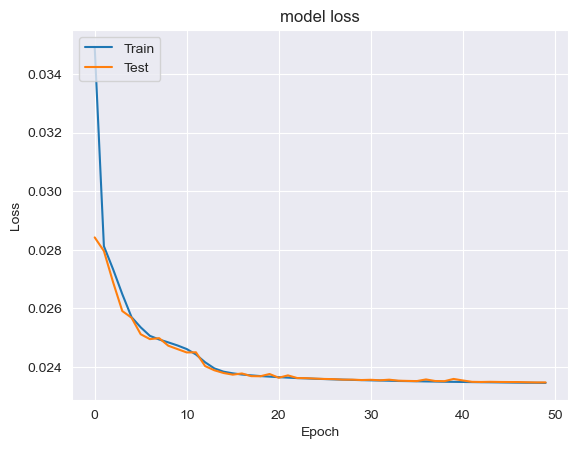

In [119]:
plot_his(history_9)

In [120]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 4s 619us/step


In [121]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  501.58237


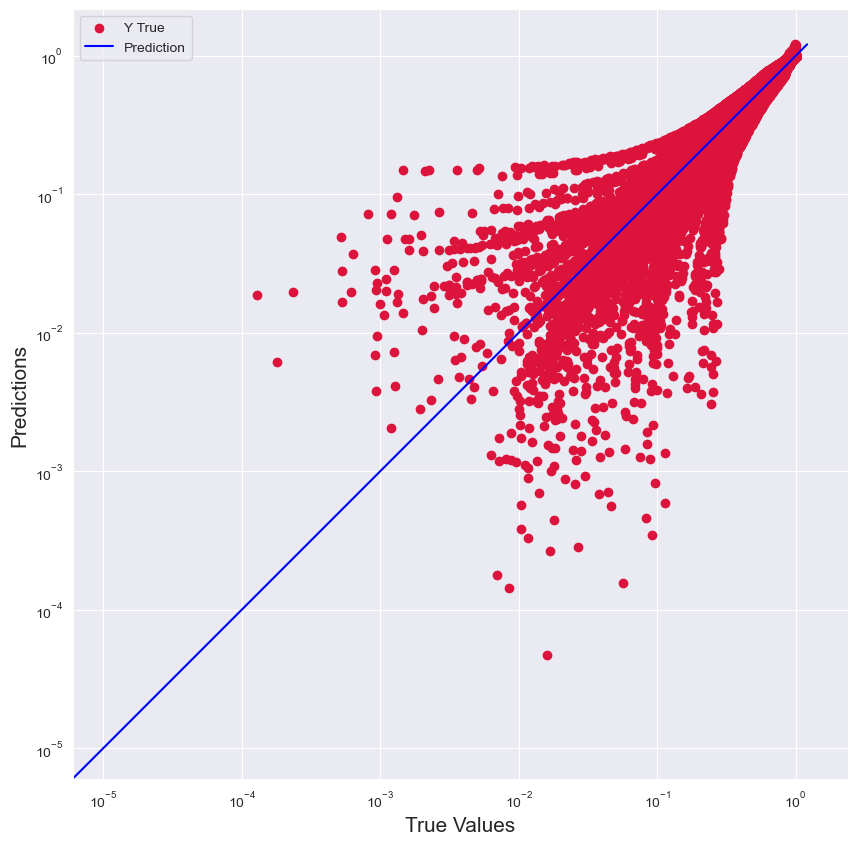

In [122]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_9, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_9), max(Y_test))
p2 = min(min(prediction_9), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [123]:
model_9.save('Saved_models/model_9_SOCesti.h5')

# Model 10

In [210]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(20,2,activation='tanh',input_shape=(3,1)),
                               tf.keras.layers.Conv1D(20,2,activation='tanh'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 117s 5ms/step - loss: 0.0494 - rmse: 0.0816 - mae: 0.0494 - mse: 0.0067 - mape: 590.7147 - val_loss: 0.0449 - val_rmse: 0.0723 - val_mae: 0.0449 - val_mse: 0.0052 - val_mape: 41.4960
Epoch 2/100
24872/24872 [==============================] - 99s 4ms/step - loss: 0.0429 - rmse: 0.0716 - mae: 0.0429 - mse: 0.0051 - mape: 488.9864 - val_loss: 0.0405 - val_rmse: 0.0704 - val_mae: 0.0405 - val_mse: 0.0050 - val_mape: 34.6668
Epoch 3/100
24872/24872 [==============================] - 103s 4ms/step - loss: 0.0392 - rmse: 0.0698 - mae: 0.0392 - mse: 0.0049 - mape: 449.8654 - val_loss: 0.0362 - val_rmse: 0.0679 - val_mae: 0.0362 - val_mse: 0.0046 - val_mape: 31.1807
Epoch 4/100
24872/24872 [==============================] - 98s 4ms/step - loss: 0.0347 - rmse: 0.0659 - mae: 0.0347 - mse: 0.0043 - mape: 447.1566 - val_loss: 0.0330 - val_rmse: 0.0633 - val_mae: 0.0330 - val_mse: 0.0040 - val_mape: 27.2527
Epoch 5/100
24872/24872 [=========

Epoch 35/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0259 - rmse: 0.0458 - mae: 0.0259 - mse: 0.0021 - mape: 472.0156 - val_loss: 0.0258 - val_rmse: 0.0459 - val_mae: 0.0258 - val_mse: 0.0021 - val_mape: 24.5816
Epoch 36/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0258 - rmse: 0.0458 - mae: 0.0258 - mse: 0.0021 - mape: 470.3177 - val_loss: 0.0258 - val_rmse: 0.0457 - val_mae: 0.0258 - val_mse: 0.0021 - val_mape: 25.5634
Epoch 37/100
24872/24872 [==============================] - 62s 2ms/step - loss: 0.0258 - rmse: 0.0457 - mae: 0.0258 - mse: 0.0021 - mape: 476.7873 - val_loss: 0.0257 - val_rmse: 0.0457 - val_mae: 0.0257 - val_mse: 0.0021 - val_mape: 25.3930
Epoch 38/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0257 - rmse: 0.0457 - mae: 0.0257 - mse: 0.0021 - mape: 480.9770 - val_loss: 0.0256 - val_rmse: 0.0457 - val_mae: 0.0256 - val_mse: 0.0021 - val_mape: 24.6655
Epoch 39/100
24872/24872 [======

Epoch 69/100
24872/24872 [==============================] - 45s 2ms/step - loss: 0.0250 - rmse: 0.0445 - mae: 0.0250 - mse: 0.0020 - mape: 487.1216 - val_loss: 0.0250 - val_rmse: 0.0446 - val_mae: 0.0250 - val_mse: 0.0020 - val_mape: 24.5405
Epoch 70/100
24872/24872 [==============================] - 45s 2ms/step - loss: 0.0250 - rmse: 0.0445 - mae: 0.0250 - mse: 0.0020 - mape: 482.4761 - val_loss: 0.0250 - val_rmse: 0.0446 - val_mae: 0.0250 - val_mse: 0.0020 - val_mape: 24.2378
Epoch 71/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0250 - rmse: 0.0445 - mae: 0.0250 - mse: 0.0020 - mape: 481.1531 - val_loss: 0.0249 - val_rmse: 0.0445 - val_mae: 0.0249 - val_mse: 0.0020 - val_mape: 24.6868
Epoch 72/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.0249 - rmse: 0.0445 - mae: 0.0249 - mse: 0.0020 - mape: 485.4579 - val_loss: 0.0249 - val_rmse: 0.0446 - val_mae: 0.0249 - val_mse: 0.0020 - val_mape: 24.2129
Epoch 73/100
24872/24872 [======

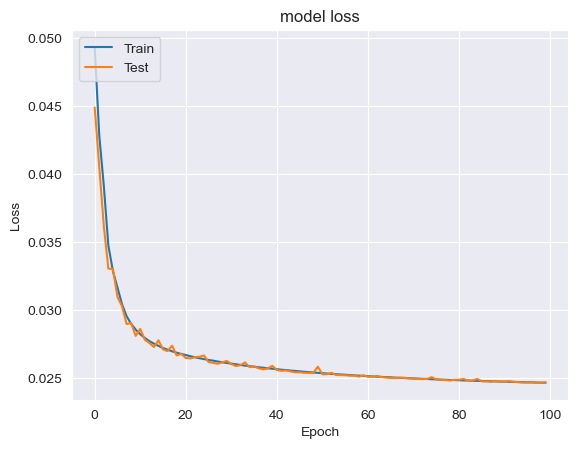

In [211]:
plot_his(history_10)

In [212]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 8s 1ms/step - loss: 0.0247 - rmse: 0.0442 - mae: 0.0247 - mse: 0.0019 - mape: 24.2038


[0.02466532215476036,
 0.044156961143016815,
 0.02466532215476036,
 0.0019498370820656419,
 24.20378303527832]

In [213]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


In [214]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  3041.5781


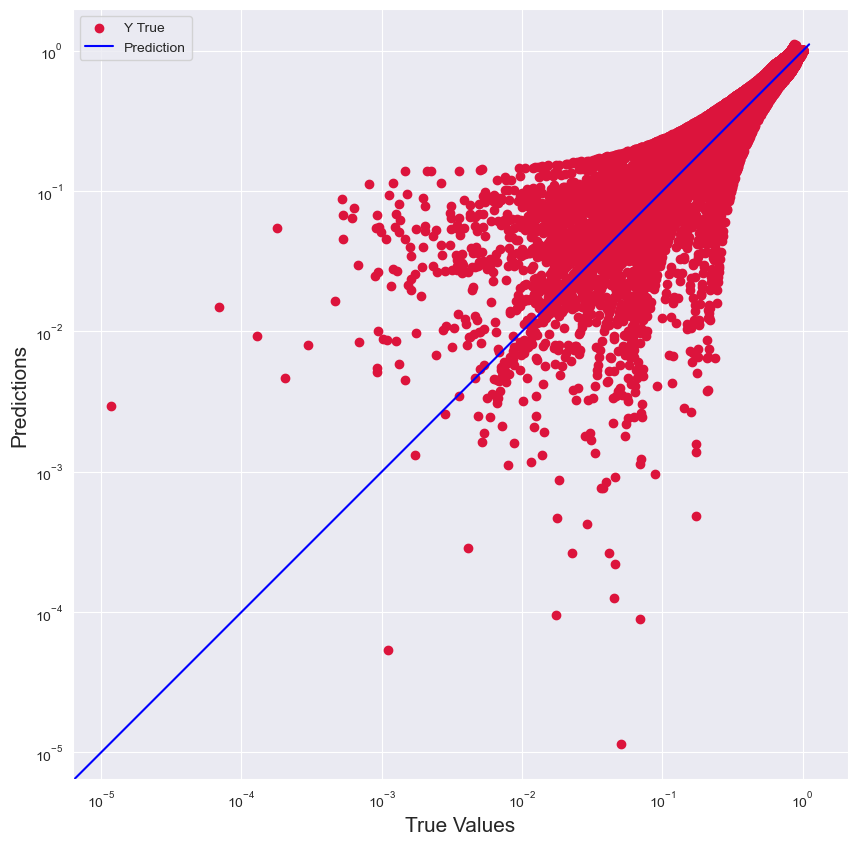

In [215]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_10, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_10), max(Y_test))
p2 = min(min(prediction_10), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [216]:
model_10.save('Saved_models/model_10_SOCesti.h5')

# Model 11

In [131]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,2,activation='linear',input_shape=(3,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 33s 1ms/step - loss: 0.0521 - rmse: 0.1079 - mae: 0.0521 - mse: 0.0116 - mape: 565.3442 - val_loss: 0.0402 - val_rmse: 0.0626 - val_mae: 0.0402 - val_mse: 0.0039 - val_mape: 31.0856
Epoch 2/100
24872/24872 [==============================] - 33s 1ms/step - loss: 0.0396 - rmse: 0.0619 - mae: 0.0396 - mse: 0.0038 - mape: 533.5936 - val_loss: 0.0390 - val_rmse: 0.0615 - val_mae: 0.0390 - val_mse: 0.0038 - val_mape: 27.6157
Epoch 3/100
24872/24872 [==============================] - 33s 1ms/step - loss: 0.0388 - rmse: 0.0612 - mae: 0.0388 - mse: 0.0037 - mape: 508.7475 - val_loss: 0.0384 - val_rmse: 0.0609 - val_mae: 0.0384 - val_mse: 0.0037 - val_mape: 26.4250
Epoch 4/100
24872/24872 [==============================] - 33s 1ms/step - loss: 0.0384 - rmse: 0.0606 - mae: 0.0384 - mse: 0.0037 - mape: 506.6659 - val_loss: 0.0381 - val_rmse: 0.0603 - val_mae: 0.0381 - val_mse: 0.0036 - val_mape: 26.6295
Epoch 5/100
24872/24872 [===========

Epoch 35/100
24872/24872 [==============================] - 33s 1ms/step - loss: 0.0328 - rmse: 0.0533 - mae: 0.0328 - mse: 0.0028 - mape: 431.7881 - val_loss: 0.0327 - val_rmse: 0.0533 - val_mae: 0.0327 - val_mse: 0.0028 - val_mape: 22.4318
Epoch 36/100
24872/24872 [==============================] - 41s 2ms/step - loss: 0.0327 - rmse: 0.0533 - mae: 0.0327 - mse: 0.0028 - mape: 429.2017 - val_loss: 0.0326 - val_rmse: 0.0532 - val_mae: 0.0326 - val_mse: 0.0028 - val_mape: 22.3740
Epoch 37/100
24872/24872 [==============================] - 49s 2ms/step - loss: 0.0327 - rmse: 0.0532 - mae: 0.0327 - mse: 0.0028 - mape: 428.1837 - val_loss: 0.0326 - val_rmse: 0.0532 - val_mae: 0.0326 - val_mse: 0.0028 - val_mape: 22.3174
Epoch 38/100
24872/24872 [==============================] - 39s 2ms/step - loss: 0.0327 - rmse: 0.0531 - mae: 0.0327 - mse: 0.0028 - mape: 429.4951 - val_loss: 0.0325 - val_rmse: 0.0531 - val_mae: 0.0325 - val_mse: 0.0028 - val_mape: 22.2678
Epoch 39/100
24872/24872 [======

Epoch 69/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.0318 - rmse: 0.0521 - mae: 0.0318 - mse: 0.0027 - mape: 417.5484 - val_loss: 0.0317 - val_rmse: 0.0521 - val_mae: 0.0317 - val_mse: 0.0027 - val_mape: 21.3809
Epoch 70/100
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0318 - rmse: 0.0520 - mae: 0.0318 - mse: 0.0027 - mape: 417.4147 - val_loss: 0.0317 - val_rmse: 0.0521 - val_mae: 0.0317 - val_mse: 0.0027 - val_mape: 21.3865
Epoch 71/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0318 - rmse: 0.0520 - mae: 0.0318 - mse: 0.0027 - mape: 417.3832 - val_loss: 0.0317 - val_rmse: 0.0521 - val_mae: 0.0317 - val_mse: 0.0027 - val_mape: 21.3922
Epoch 72/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0317 - rmse: 0.0520 - mae: 0.0317 - mse: 0.0027 - mape: 417.2352 - val_loss: 0.0317 - val_rmse: 0.0520 - val_mae: 0.0317 - val_mse: 0.0027 - val_mape: 21.3795
Epoch 73/100
24872/24872 [======

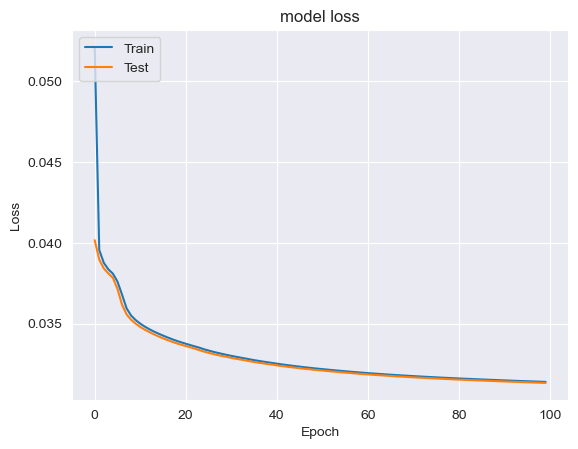

In [132]:
plot_his(history_11)

In [133]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 0.0313 - rmse: 0.0516 - mae: 0.0313 - mse: 0.0027 - mape: 21.1618


[0.03133781626820564,
 0.051597509533166885,
 0.03133781626820564,
 0.0026623031590133905,
 21.161808013916016]

In [134]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 6s 883us/step


In [135]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  7553.5864


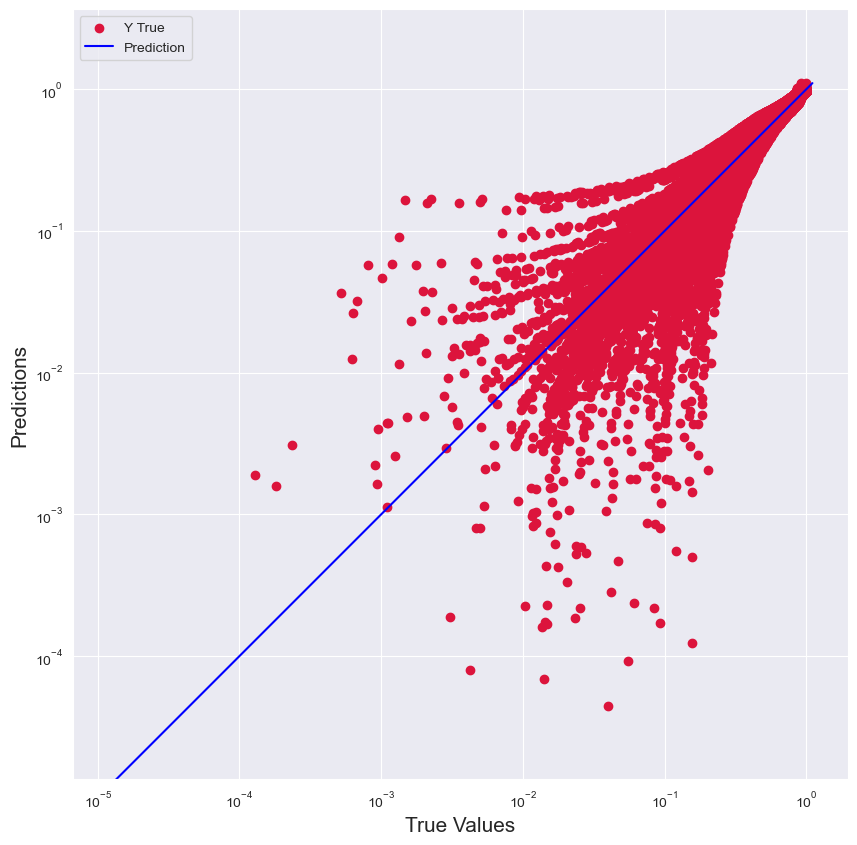

In [136]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_11, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_11), max(Y_test))
p2 = min(min(prediction_11), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [137]:
model_11.save('Saved_models/model_11_SOCesti.h5')

# Model 12

In [138]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,2,activation='linear',input_shape=(3,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0757 - rmse: 0.1199 - mae: 0.0757 - mse: 0.0144 - mape: 772.4091 - val_loss: 0.0728 - val_rmse: 0.1153 - val_mae: 0.0728 - val_mse: 0.0133 - val_mape: 93.5765
Epoch 2/100
24872/24872 [==============================] - 47s 2ms/step - loss: 0.0736 - rmse: 0.1144 - mae: 0.0736 - mse: 0.0131 - mape: 753.9420 - val_loss: 0.0737 - val_rmse: 0.1116 - val_mae: 0.0737 - val_mse: 0.0125 - val_mape: 87.6721
Epoch 3/100
24872/24872 [==============================] - 47s 2ms/step - loss: 0.0734 - rmse: 0.1143 - mae: 0.0734 - mse: 0.0131 - mape: 754.2653 - val_loss: 0.0730 - val_rmse: 0.1116 - val_mae: 0.0730 - val_mse: 0.0124 - val_mape: 87.9849
Epoch 4/100
24872/24872 [==============================] - 47s 2ms/step - loss: 0.0733 - rmse: 0.1142 - mae: 0.0733 - mse: 0.0130 - mape: 760.4136 - val_loss: 0.0731 - val_rmse: 0.1131 - val_mae: 0.0731 - val_mse: 0.0128 - val_mape: 88.8004
Epoch 5/100
24872/24872 [===========

Epoch 35/100
24872/24872 [==============================] - 46s 2ms/step - loss: 0.0731 - rmse: 0.1141 - mae: 0.0731 - mse: 0.0130 - mape: 781.5624 - val_loss: 0.0728 - val_rmse: 0.1132 - val_mae: 0.0728 - val_mse: 0.0128 - val_mape: 90.8312
Epoch 36/100
24872/24872 [==============================] - 45s 2ms/step - loss: 0.0731 - rmse: 0.1140 - mae: 0.0731 - mse: 0.0130 - mape: 775.6575 - val_loss: 0.0728 - val_rmse: 0.1142 - val_mae: 0.0728 - val_mse: 0.0130 - val_mape: 91.5895
Epoch 37/100
24872/24872 [==============================] - 46s 2ms/step - loss: 0.0731 - rmse: 0.1141 - mae: 0.0731 - mse: 0.0130 - mape: 780.5782 - val_loss: 0.0728 - val_rmse: 0.1135 - val_mae: 0.0728 - val_mse: 0.0129 - val_mape: 91.4134
Epoch 38/100
24872/24872 [==============================] - 46s 2ms/step - loss: 0.0731 - rmse: 0.1140 - mae: 0.0731 - mse: 0.0130 - mape: 780.6977 - val_loss: 0.0728 - val_rmse: 0.1141 - val_mae: 0.0728 - val_mse: 0.0130 - val_mape: 92.3083
Epoch 39/100
24872/24872 [======

Epoch 69/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0731 - rmse: 0.1141 - mae: 0.0731 - mse: 0.0130 - mape: 775.1970 - val_loss: 0.0728 - val_rmse: 0.1132 - val_mae: 0.0728 - val_mse: 0.0128 - val_mape: 90.9192
Epoch 70/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0731 - rmse: 0.1140 - mae: 0.0731 - mse: 0.0130 - mape: 774.9271 - val_loss: 0.0728 - val_rmse: 0.1138 - val_mae: 0.0728 - val_mse: 0.0129 - val_mape: 91.6241
Epoch 71/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0731 - rmse: 0.1140 - mae: 0.0731 - mse: 0.0130 - mape: 773.4349 - val_loss: 0.0728 - val_rmse: 0.1139 - val_mae: 0.0728 - val_mse: 0.0130 - val_mape: 91.5652
Epoch 72/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0731 - rmse: 0.1141 - mae: 0.0731 - mse: 0.0130 - mape: 772.9177 - val_loss: 0.0728 - val_rmse: 0.1131 - val_mae: 0.0728 - val_mse: 0.0128 - val_mape: 90.8819
Epoch 73/100
24872/24872 [======

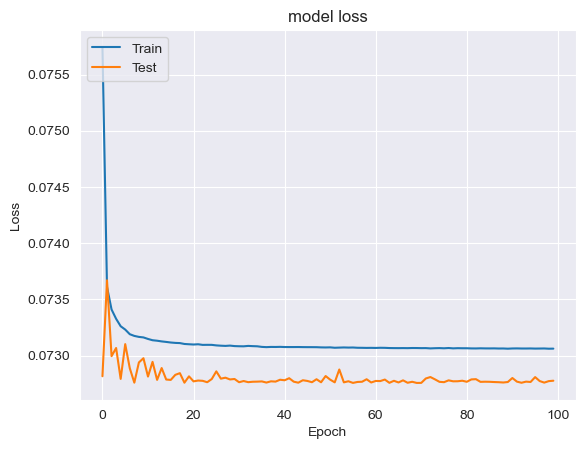

In [139]:
plot_his(history_12)

In [140]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 8s 1ms/step - loss: 0.0728 - rmse: 0.1129 - mae: 0.0728 - mse: 0.0127 - mape: 90.3395


[0.07277797162532806,
 0.11289295554161072,
 0.07277797162532806,
 0.012744818814098835,
 90.33953857421875]

In [141]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


In [142]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  7553.5864


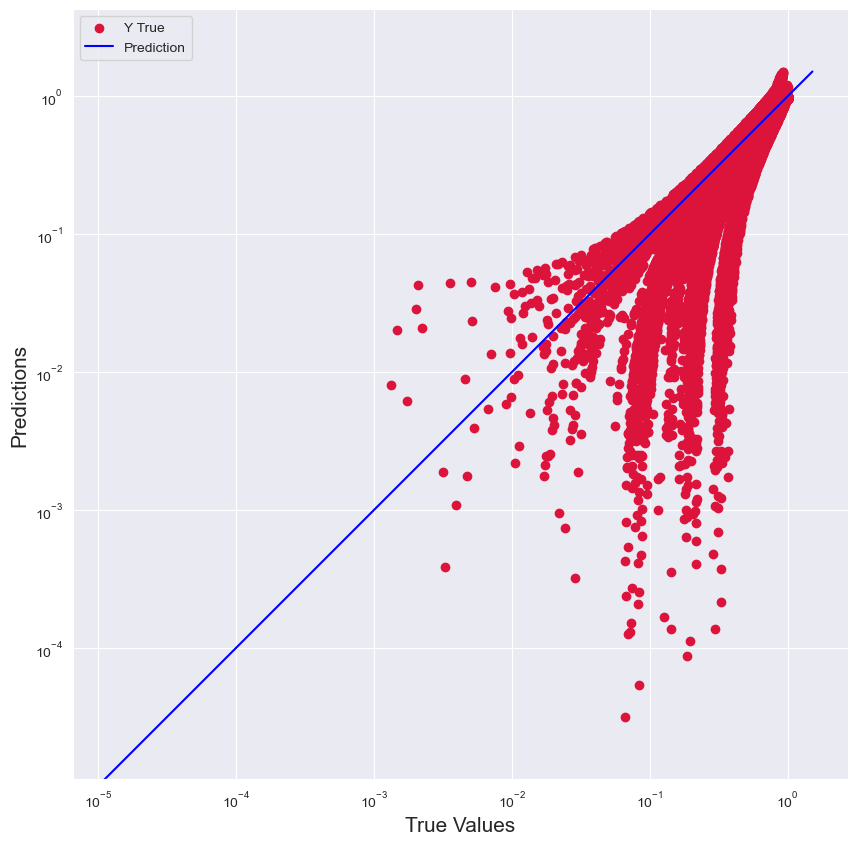

In [143]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_12, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_12), max(Y_test))
p2 = min(min(prediction_12), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [144]:
model_12.save('Saved_models/model_12_SOCesti.h5')

# Results and Discussions

In [145]:
# AIC_value(model_1,Y_pred_1,Y_test)
# AIC_value(model_2,Y_pred_2,Y_test)
# AIC_value(model_3,Y_pred_3,Y_test)
# AIC_value(model_4,Y_pred_4,Y_test)
# AIC_value(model_5,prediction_5,Y_test)
# AIC_value(model_6,prediction_6,Y_test)
# AIC_value(model_7,prediction_7[:198976],Y_test)
# AIC_value(model_8,prediction_8,Y_test)
# AIC_value(model_9,prediction_9,Y_test)
# AIC_value(model_10,prediction_10,Y_test)
# AIC_value(model_11,prediction_11,Y_test)
# AIC_value(model_12,prediction_12,Y_test)


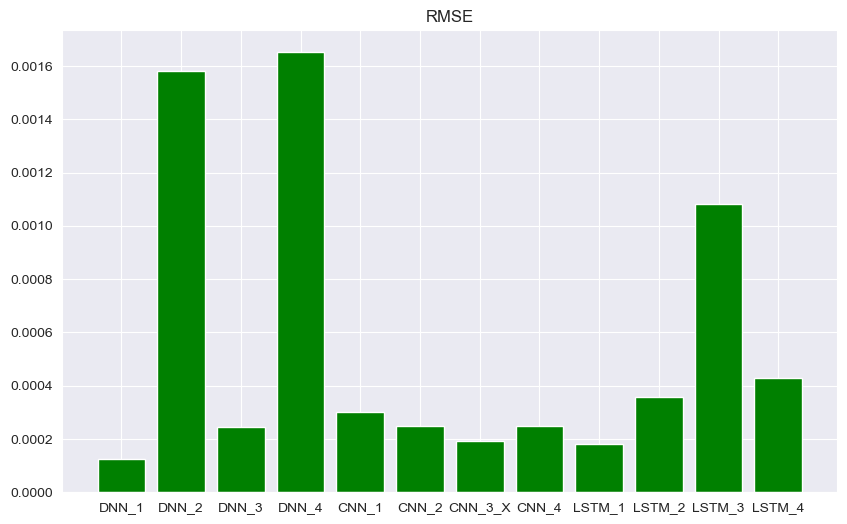

In [146]:
rmse_score = { 'DNN_1':0.000124903,'DNN_2':0.001580797,'DNN_3':0.00024606,'DNN_4':0.00165169,'CNN_1':0.00030274,
              'CNN_2':0.00024752,'CNN_3_X':0.0001937482,'CNN_4':0.00024752,'LSTM_1':0.0001818,
             'LSTM_2':0.000358092, 'LSTM_3':0.00108152, 'LSTM_4':0.000430131 }
names = list(rmse_score.keys())
values = list(rmse_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(rmse_score)), values, tick_label=names,color='green')

plt.title('RMSE')
plt.show()

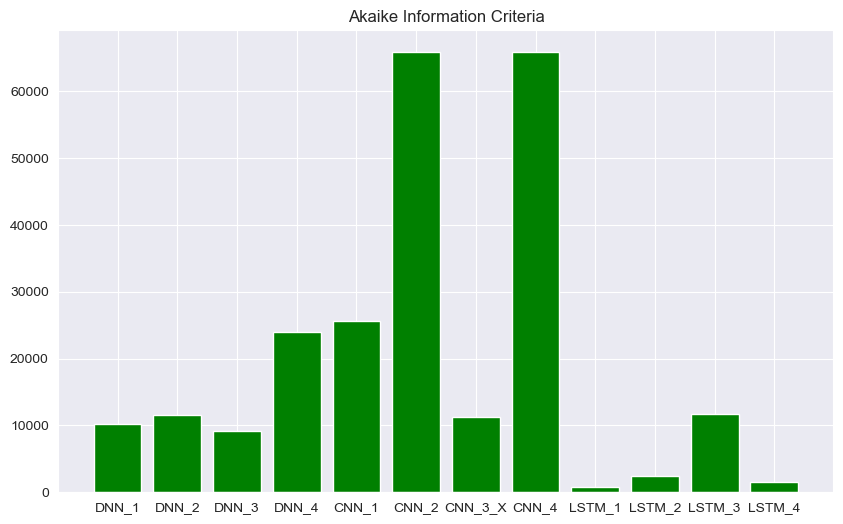

In [147]:
AIC_score = { 'DNN_1':10161.582,'DNN_2':11601.582,'DNN_3':9121.582,'DNN_4':23941.582,'CNN_1':25701.582,
              'CNN_2':65841.58,'CNN_3_X':11200.341,'CNN_4':65841.586,'LSTM_1':741.5822,
             'LSTM_2':2361.582, 'LSTM_3':11713.582, 'LSTM_4':1557.5822 }
names = list(AIC_score.keys())
values = list(AIC_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(AIC_score)), values, tick_label=names,color='green')

plt.title('Akaike Information Criteria')
plt.show()

Text(0.5, 1.0, 'Dataset')

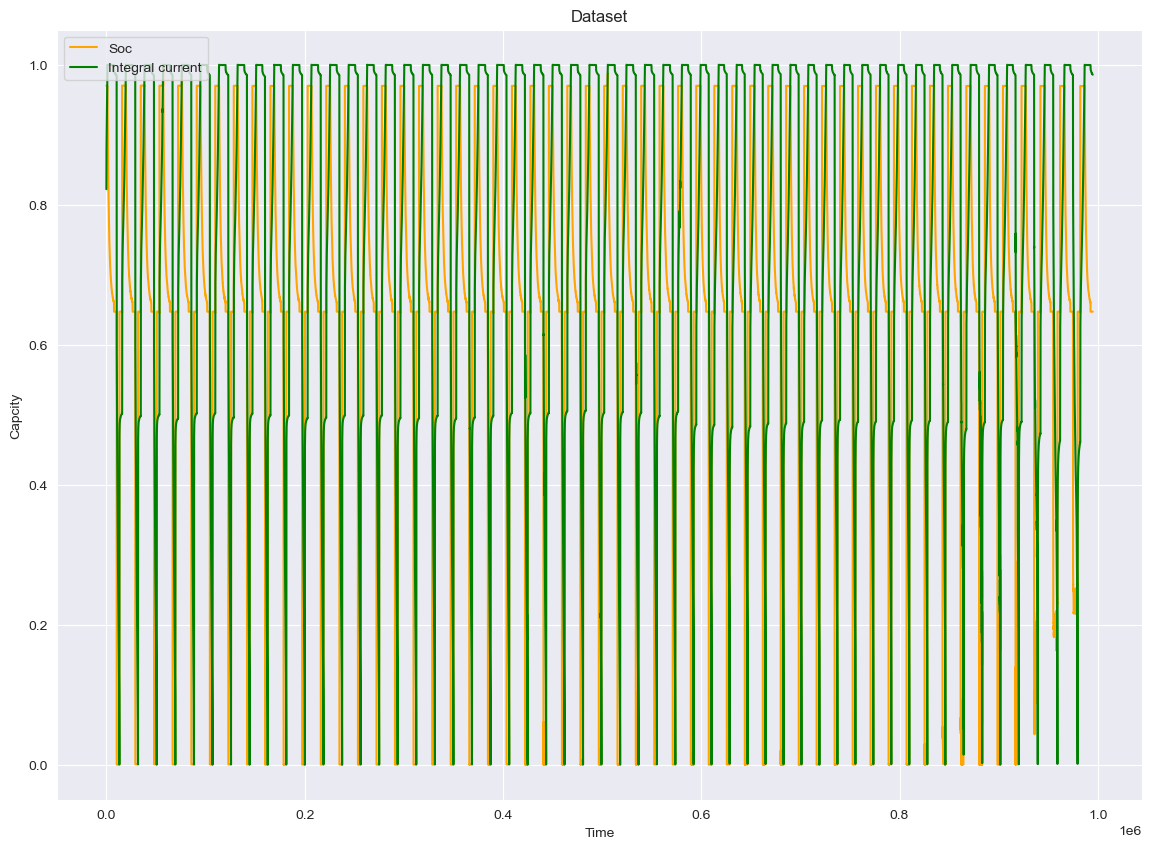

In [148]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['Current'],color='orange')
plt.plot(df['Potential'],color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [149]:
# link for Prediction Graphs - https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value

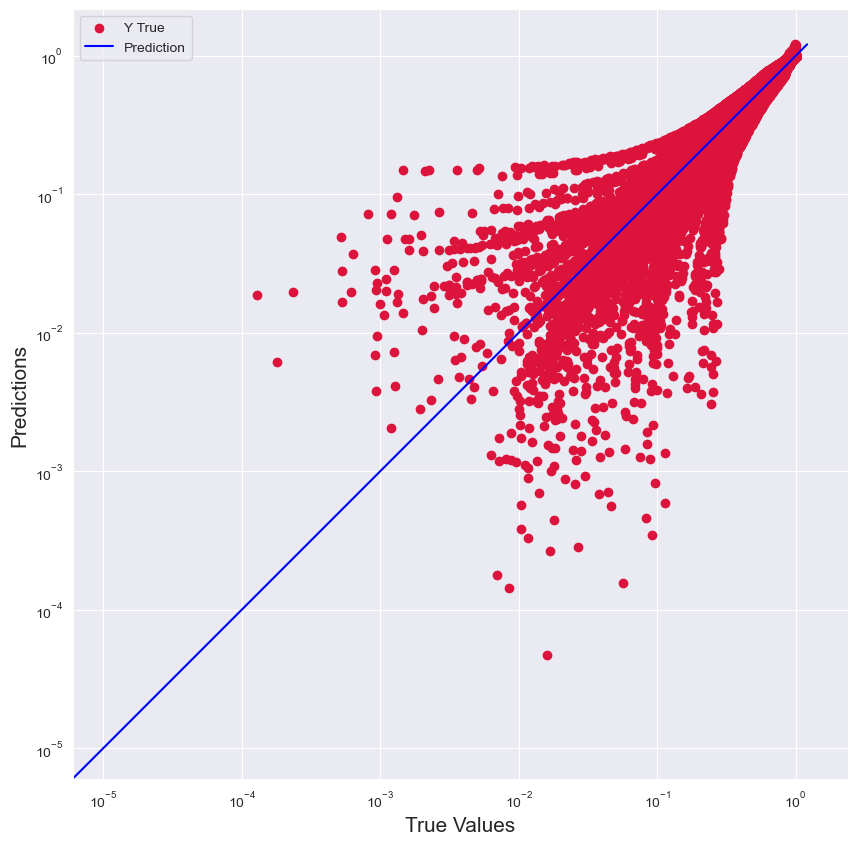

In [150]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_9, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_9), max(Y_test))
p2 = min(min(prediction_9), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

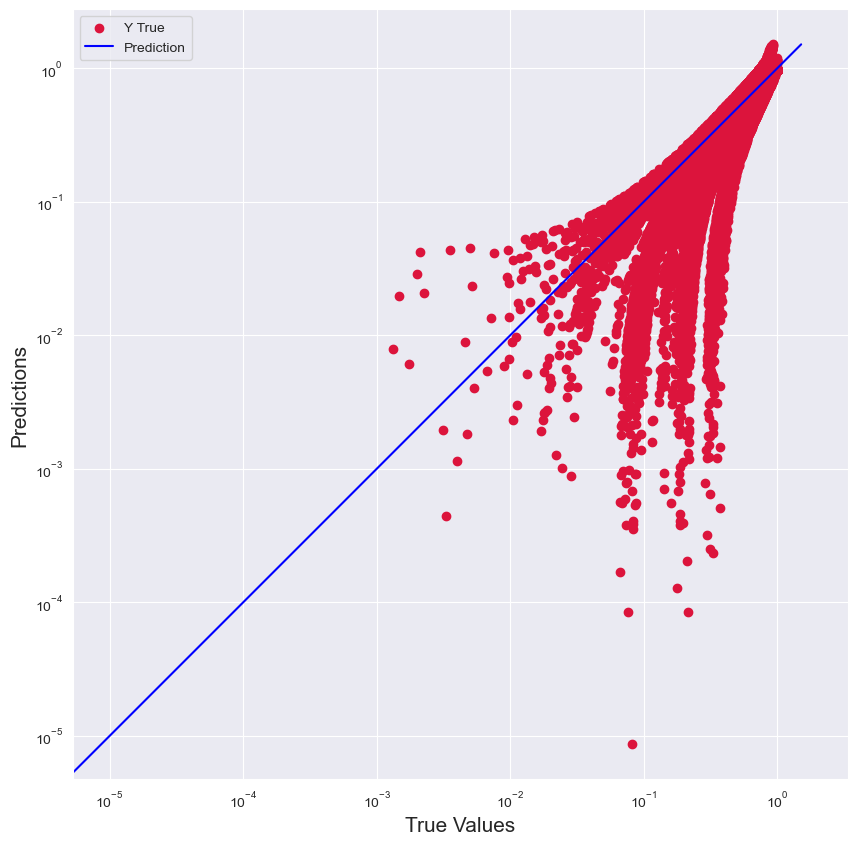

In [151]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_1), max(Y_test))
p2 = min(min(Y_pred_1), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [152]:
plt.figure(figsize=(10,6))
plt.scatter(df['Potential'], df['Capacity'], c='crimson')
plt.xlabel('Potential', fontsize=15)
plt.ylabel('Capacity', fontsize=15)
plt.axis('equal')
plt.show()

KeyError: 'Capacity'

<Figure size 1000x600 with 0 Axes>